In [1]:
import glob,os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
import seaborn as sns

In [2]:
files = glob.glob('/oak/stanford/groups/mrivas/projects/degas-risk/scorefiles/results/*_center_*.tsv')
print('\n'.join(map(os.path.basename,files)))

all_z_center_p00001_20190621_100PCs.pearsonr.tsv
all_beta_center_p1e-06_20190621_500PCs.pearsonr.tsv
all_z_center_p001_20190621_50PCs.pearsonr.tsv
all_z_center_p1e-05_20190621_50PCs.pearsonr.tsv
all_beta_center_p001_20190621_300PCs.pearsonr.tsv
all_z_center_p1e-05_20190621_100PCs.pearsonr.tsv
all_beta_center_p1e-06_20190621_100PCs.pearsonr.tsv
all_z_center_p00001_20190621_50PCs.pearsonr.tsv
all_beta_center_p1e-05_20190621_50PCs.pearsonr.tsv
all_beta_center_p1e-06_20190621_300PCs.pearsonr.tsv
all_beta_center_p1e-05_20190621_500PCs.pearsonr.tsv
all_beta_center_p001_20190621_50PCs.pearsonr.tsv
all_beta_center_p001_20190621_100PCs.pearsonr.tsv
all_z_center_p00001_20190621_300PCs.pearsonr.tsv
all_beta_center_p00001_20190621_500PCs.pearsonr.tsv
all_beta_center_p1e-05_20190621_100PCs.pearsonr.tsv
all_z_center_p1e-05_20190621_500PCs.pearsonr.tsv
all_z_center_p001_20190621_100PCs.pearsonr.tsv
all_beta_center_p1e-05_20190621_300PCs.pearsonr.tsv
all_beta_center_p1e-06_20190621_50PCs.pearsonr.tsv


In [3]:
kind='RESID'
datas = dict([(os.path.basename(f)[4:-13].replace('_20190621',''),
               pd.read_table(f, index_col=0, usecols=['PHE','WBR_'+kind,'NBW_'+kind])) for f in files])

In [4]:
wbr=pd.DataFrame([datas[ds]['WBR_'+kind] for ds in datas], 
                 index=[ds for ds in datas]).T
wbr.head()

,z_center_p00001_300PCs,z_center_p1e-06_50PCs,beta_center_p0001_100PCs,beta_center_p00001_500PCs,beta_center_p001_50PCs,beta_center_p001_100PCs,beta_center_p00001_300PCs,z_center_p1e-06_300PCs,z_center_p001_100PCs,z_center_p00001_500PCs,...,z_center_p0001_300PCs,z_center_p001_500PCs,z_center_p1e-05_300PCs,z_center_p1e-05_500PCs,beta_center_p001_300PCs,beta_center_p0001_500PCs,z_center_p0001_500PCs,beta_center_p1e-06_500PCs,beta_center_p1e-05_300PCs,beta_center_p1e-05_50PCs
BIN10030500,0.000151,0.000010,0.000663,0.000628,0.001586,0.001656,0.000297,0.000078,0.000575,0.000260,...,0.000137,0.012365,0.000092,0.000087,0.040417,0.006938,0.003950,2.652722e-05,0.000083,0.000107
BIN10030510,0.000021,0.000116,0.000517,0.000617,0.001741,0.001993,0.000264,0.000032,0.000472,0.000308,...,0.000099,0.010119,0.000035,0.000109,0.052864,0.012222,0.002771,6.409530e-05,0.000112,0.000021
BIN10030800,0.000306,-0.000003,0.000418,0.000685,0.000045,0.000371,0.000524,0.000462,0.000367,0.000401,...,0.000343,0.000467,0.000122,0.000147,0.000586,0.000665,0.000407,5.725055e-04,0.000480,0.000011
BIN10030820,0.001603,0.001387,0.001742,0.002447,0.001718,0.001786,0.001836,0.001489,0.001384,0.001659,...,0.001498,0.001397,0.001494,0.001544,0.001872,0.002494,0.001523,2.310288e-03,0.001837,0.001561
BIN1020483,-0.000003,-0.000001,0.000006,0.000048,0.000587,0.002574,0.000057,0.000003,0.000001,-0.000001,...,0.000002,0.000302,-0.000003,0.000004,0.003155,0.000463,-0.000003,2.250709e-07,0.000002,-0.000003


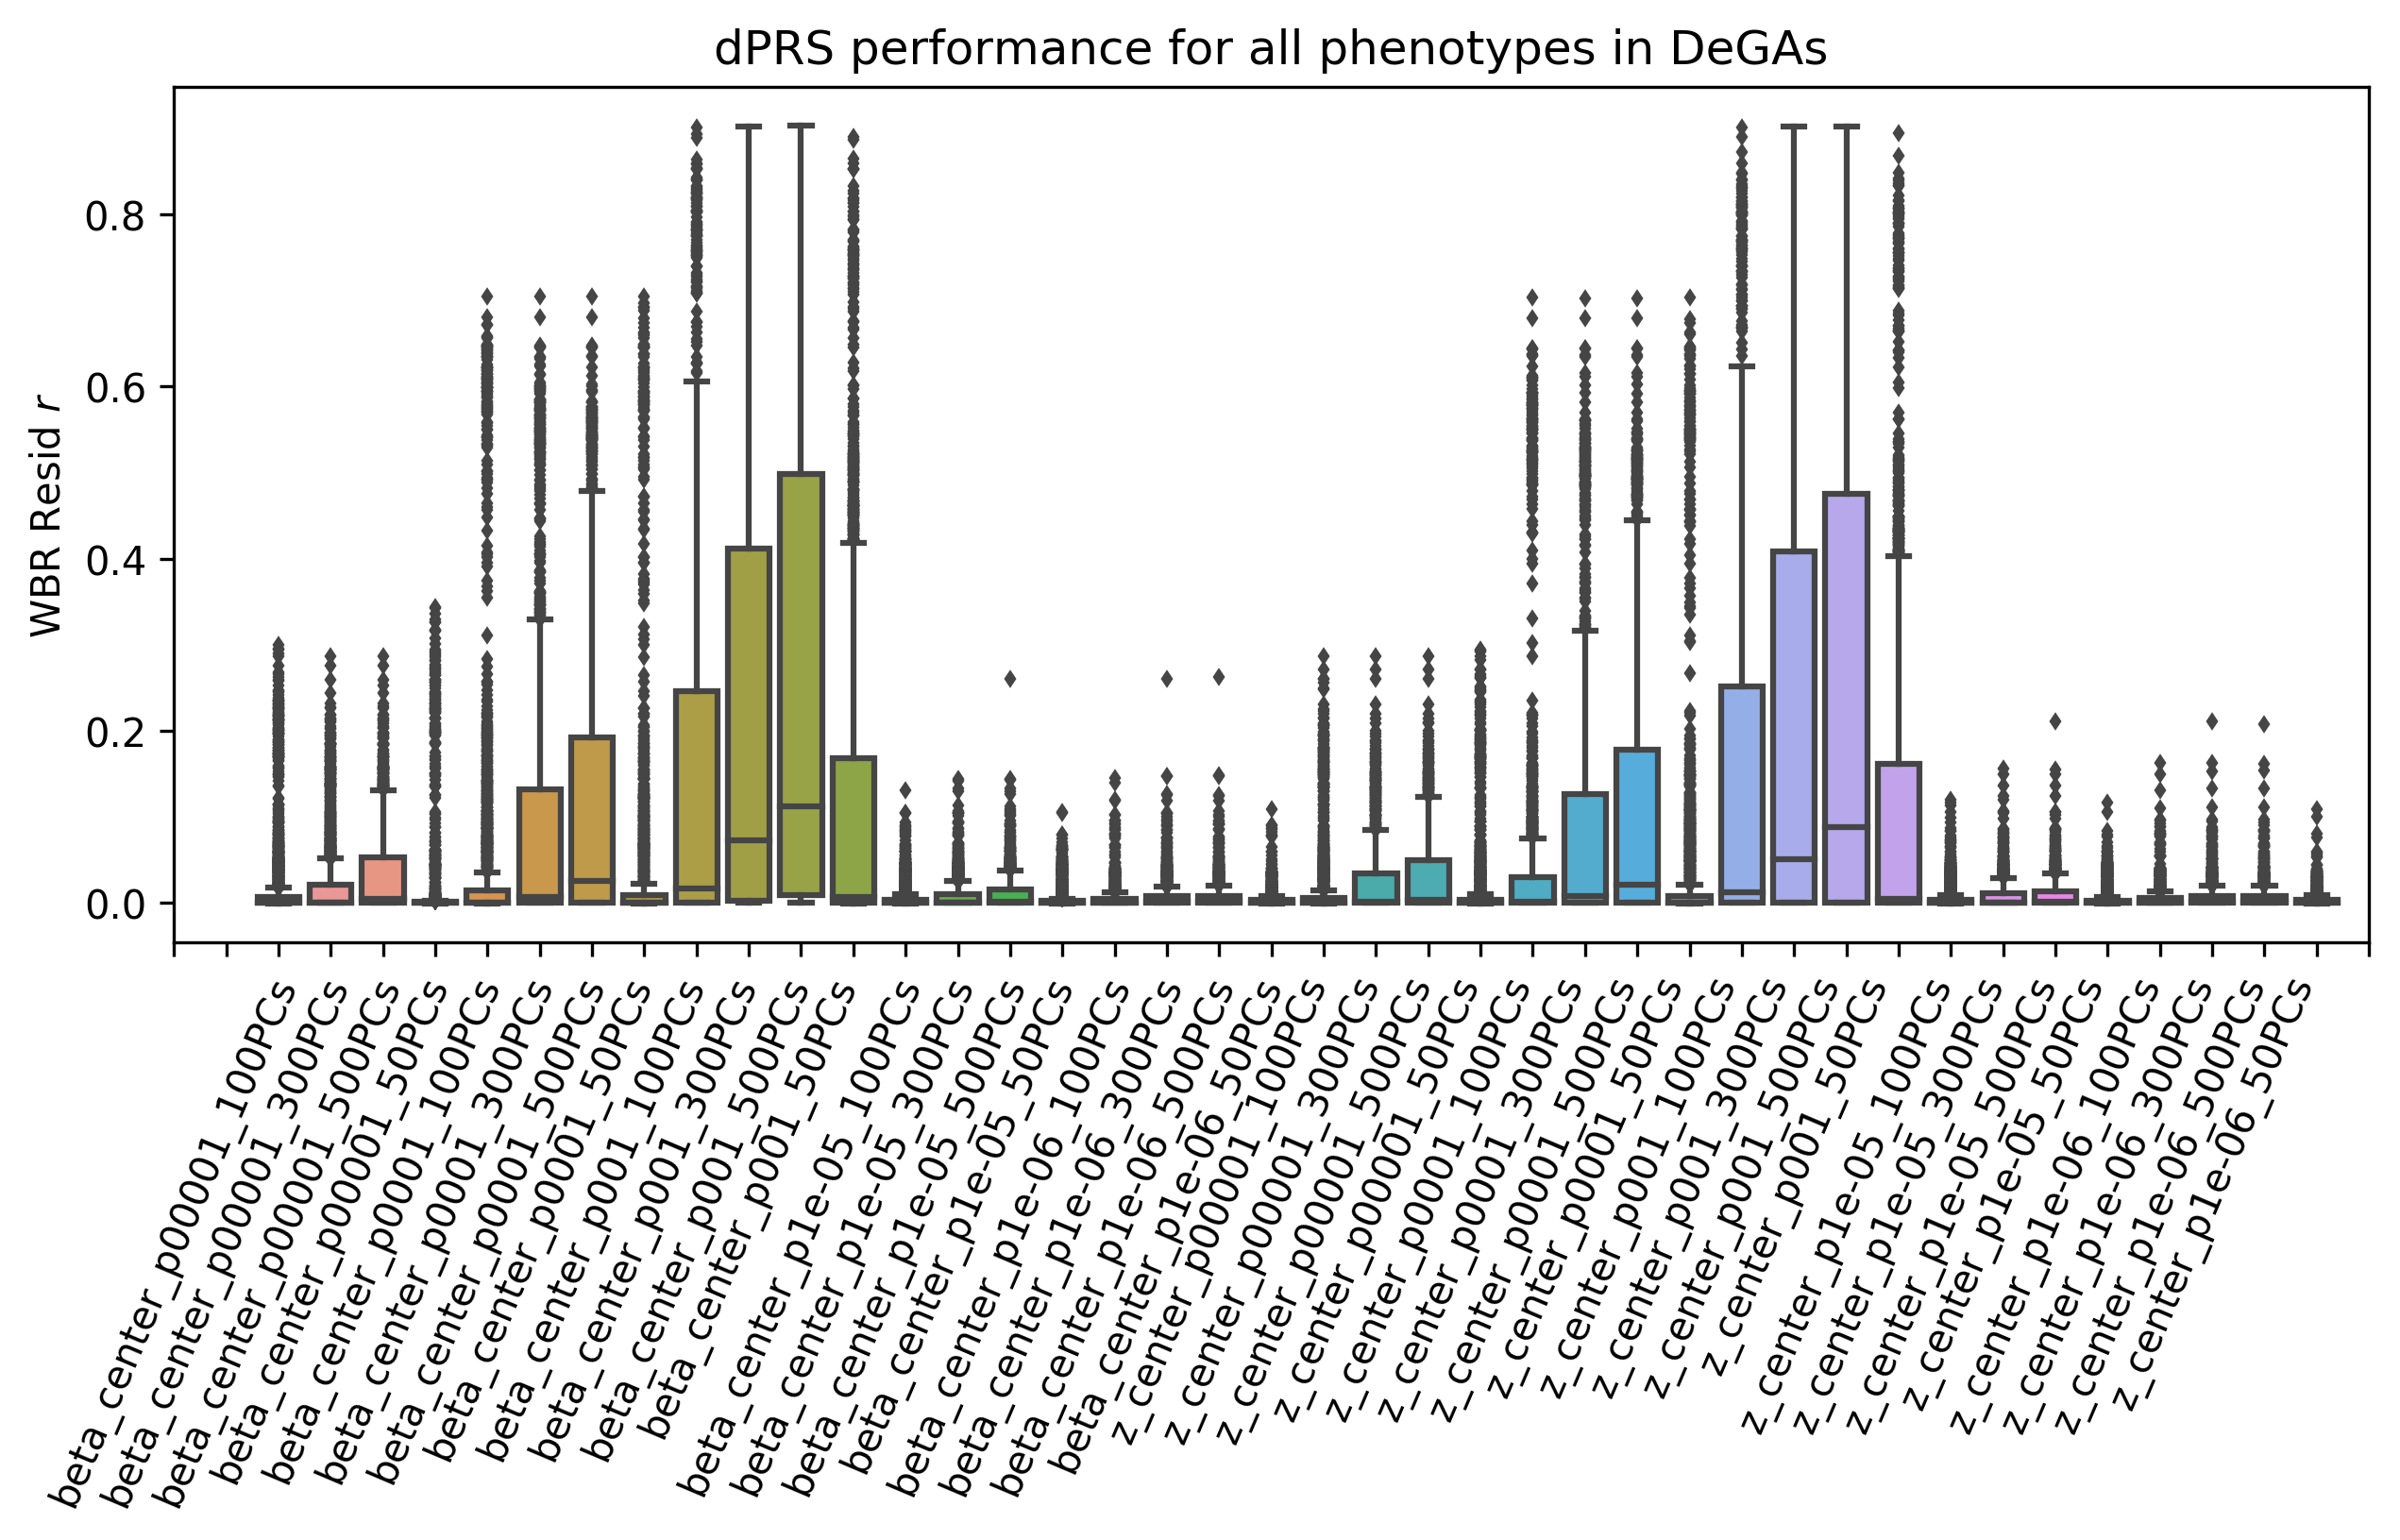

In [5]:
plt.figure(figsize=(10,4),dpi=300)
sns.boxplot(x='dataset',y='rsq',
            data=wbr.melt(var_name='dataset',value_name='rsq').sort_values('dataset'),
            fliersize=2)
plt.xticks(list(range(-2,len(files)+1)), rotation=67), plt.xlabel('')
plt.ylabel(' '.join(['WBR',kind.lower().capitalize(),'$r$']))
plt.title('dPRS performance for all phenotypes in DeGAs')
plt.show()

In [6]:
nbw=pd.DataFrame([datas[ds]['NBW_'+kind] for ds in datas], 
                 index=[ds for ds in datas]).T
nbw.head()

,z_center_p00001_300PCs,z_center_p1e-06_50PCs,beta_center_p0001_100PCs,beta_center_p00001_500PCs,beta_center_p001_50PCs,beta_center_p001_100PCs,beta_center_p00001_300PCs,z_center_p1e-06_300PCs,z_center_p001_100PCs,z_center_p00001_500PCs,...,z_center_p0001_300PCs,z_center_p001_500PCs,z_center_p1e-05_300PCs,z_center_p1e-05_500PCs,beta_center_p001_300PCs,beta_center_p0001_500PCs,z_center_p0001_500PCs,beta_center_p1e-06_500PCs,beta_center_p1e-05_300PCs,beta_center_p1e-05_50PCs
BIN10030500,-0.000020,0.000199,0.000389,0.000019,0.000404,0.000255,0.000008,-0.000024,0.000291,-0.000040,...,0.000005,0.000036,-0.000028,-0.000006,0.000607,0.000151,0.000021,-0.000035,-4.051500e-05,-0.000020
BIN10030510,-0.000023,-0.000039,0.000368,0.000126,0.000693,0.000605,0.000030,0.000002,0.000583,-0.000012,...,0.000013,0.000195,-0.000039,-0.000038,0.001260,0.000894,0.000182,-0.000007,-1.591526e-05,0.000059
BIN10030800,0.000377,-0.000044,-0.000036,0.000628,-0.000043,-0.000043,0.000126,0.000406,-0.000025,0.000739,...,0.000558,0.000200,0.000440,0.000558,-0.000013,0.000366,0.000661,0.000717,1.379919e-04,-0.000004
BIN10030820,0.002181,0.002162,0.002310,0.002893,0.002226,0.002299,0.002491,0.001689,0.001806,0.002190,...,0.001984,0.001777,0.002026,0.001837,0.002386,0.002751,0.001991,0.002827,2.496485e-03,0.002294
BIN1020483,-0.000033,-0.000038,-0.000039,-0.000017,-0.000029,0.000030,-0.000032,-0.000014,0.000117,-0.000028,...,-0.000039,0.000008,0.000003,0.000115,-0.000004,-0.000010,-0.000038,0.000033,5.859815e-07,0.000003


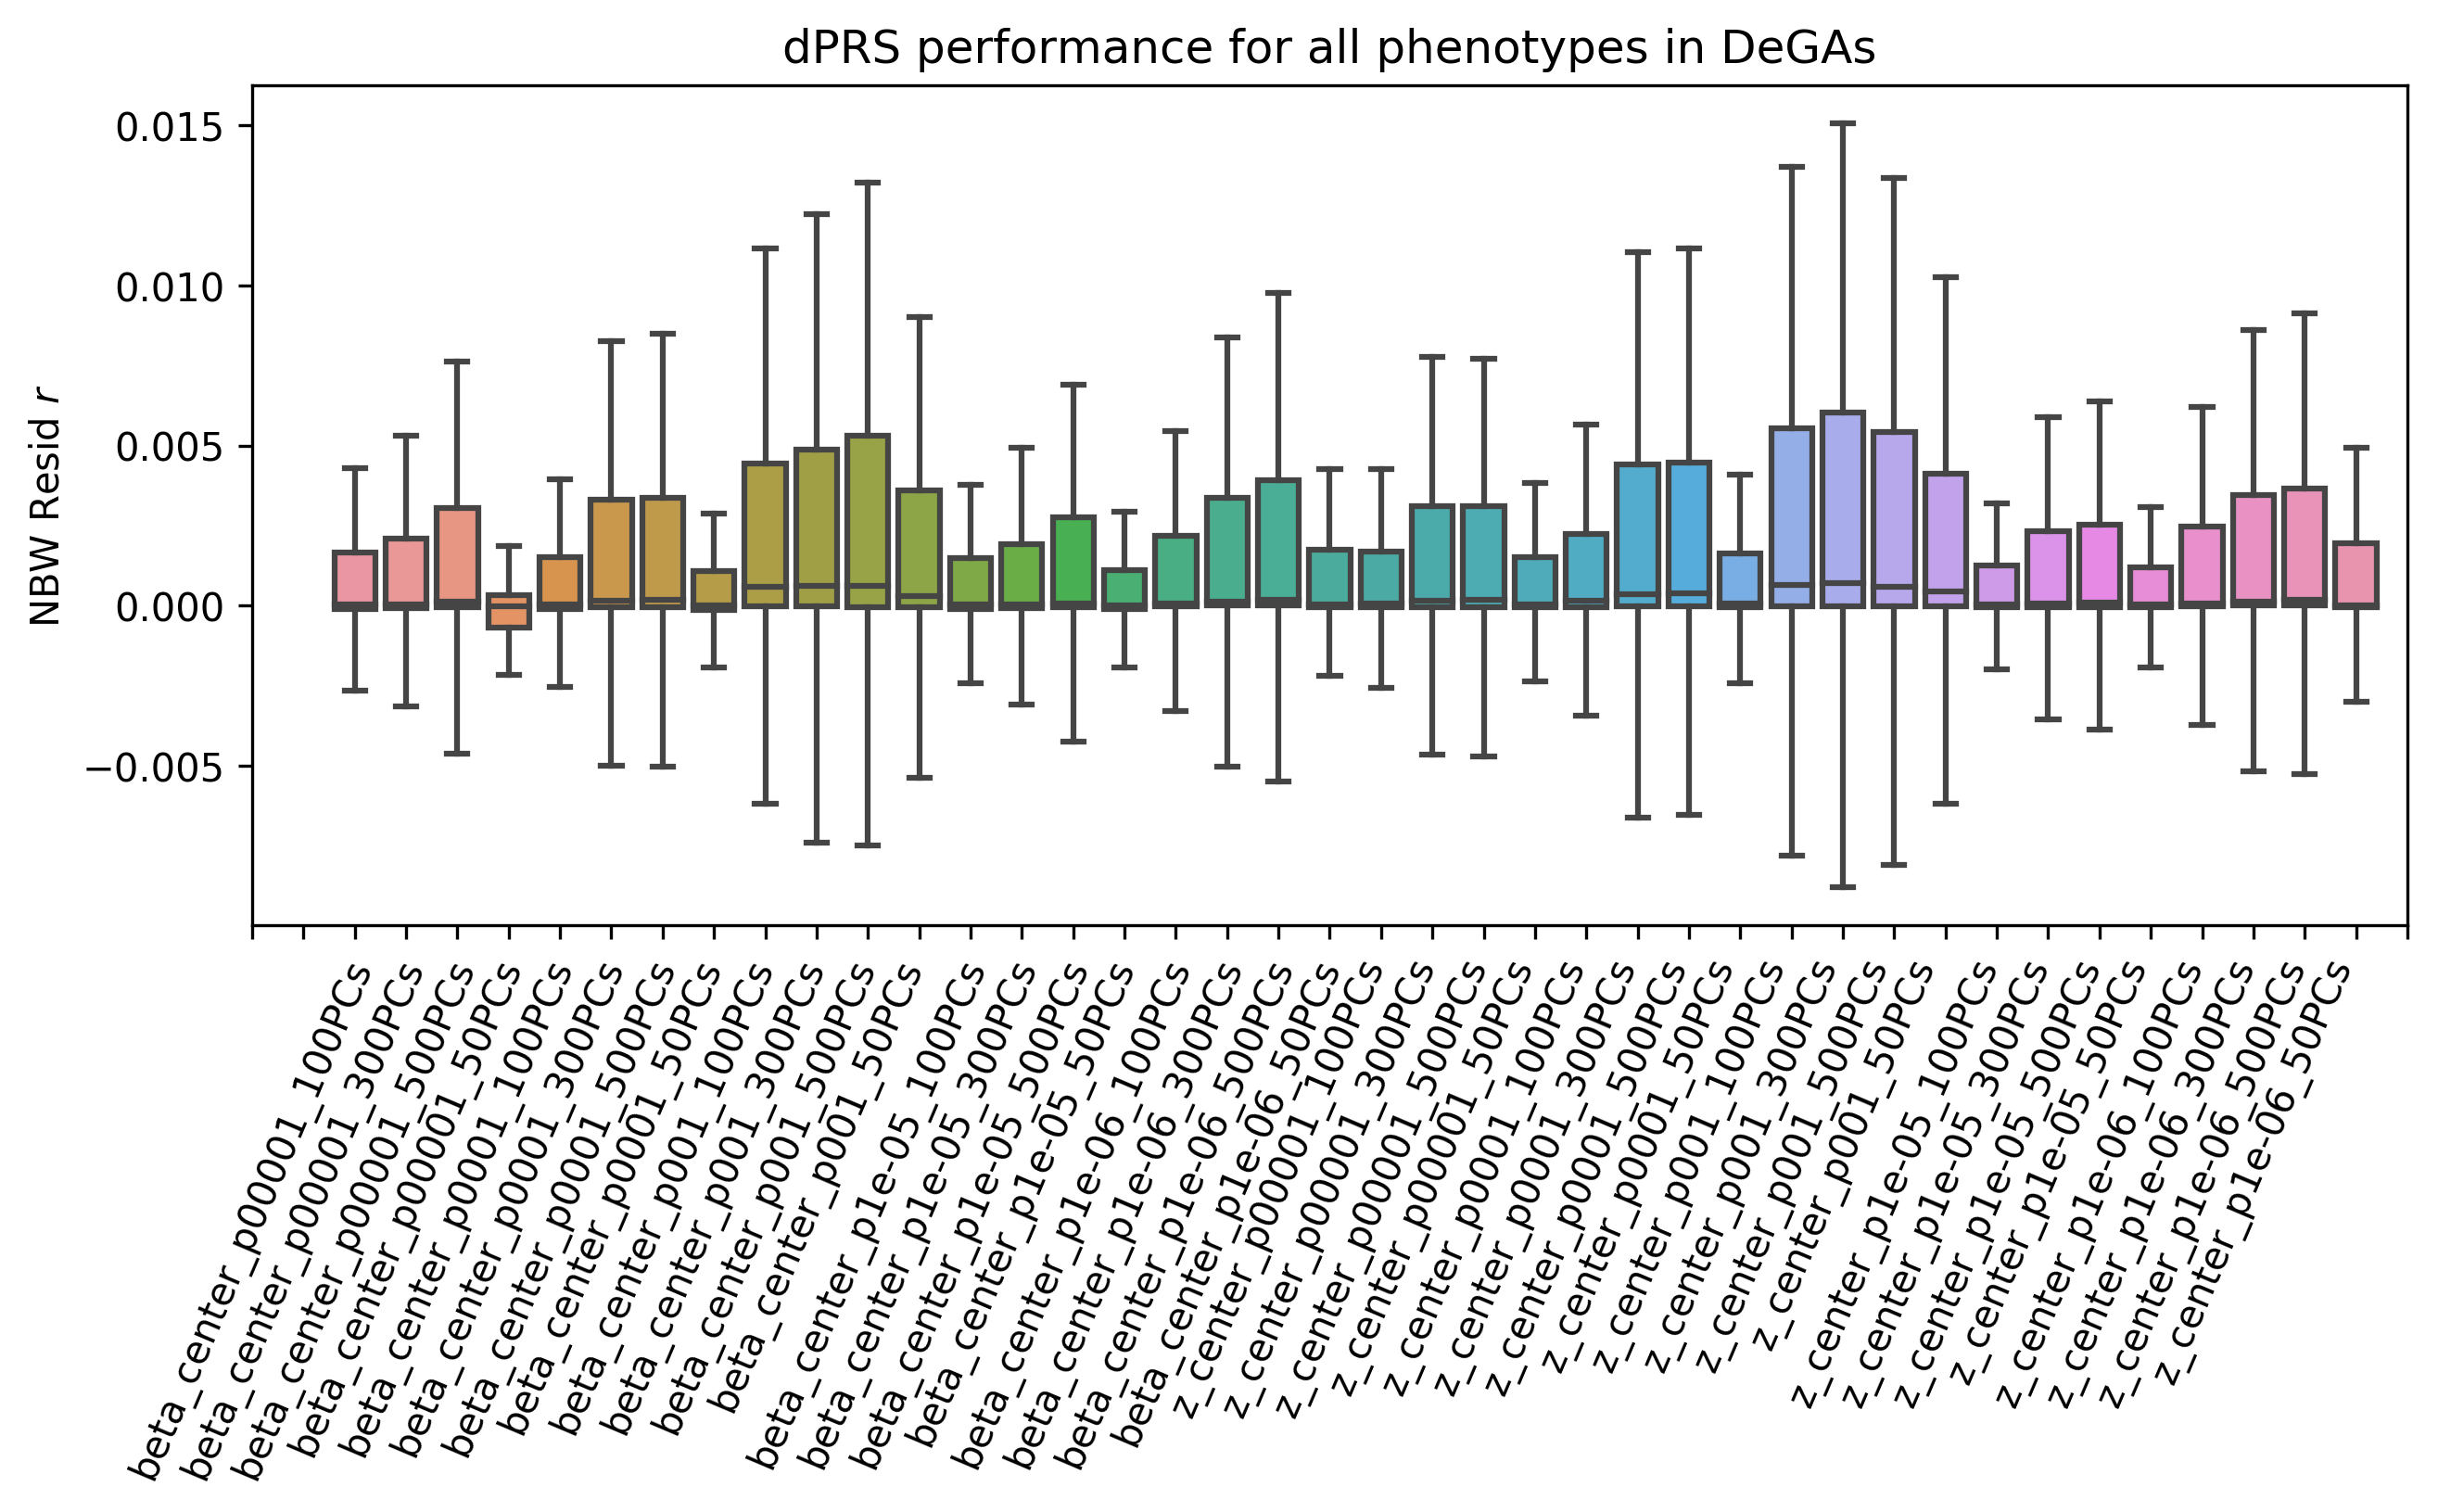

In [7]:
plt.figure(figsize=(10,4),dpi=300)
sns.boxplot(x='dataset',y='rsq',
            data=nbw.melt(var_name='dataset',value_name='rsq').sort_values('dataset'),
            showfliers=0)
plt.xticks(list(range(-2,len(files)+1)), rotation=67), plt.xlabel('')
plt.ylabel(' '.join(['NBW',kind.lower().capitalize(),'$r$']))
plt.title('dPRS performance for all phenotypes in DeGAs')
plt.show()

In [8]:
datas['beta_center_p001_100PCs'].sort_values('WBR_'+kind).dropna()[::-1].head()

,WBR_RESID,NBW_RESID
PHE,,
INI22153,0.900916,0.132745
INI5430,0.892871,-0.000789
INI23281,0.889171,0.010940
INI23293,0.863604,-0.004123
INI23213,0.858822,-0.005139


In [9]:
datas['beta_center_p001_100PCs'].sort_values('NBW_'+kind).dropna()[::-1].head()

,WBR_RESID,NBW_RESID
PHE,,
INI22148,0.801962,0.407468
INI50,0.250337,0.184416
INI20153,0.207381,0.145286
INI22153,0.900916,0.132745
INI12144,0.232952,0.114761


In [10]:
pd.DataFrame([datas[d].loc['INI50',:] for d in datas], index=[d for d in datas]).sort_values('NBW_'+kind)[::-1]

,WBR_RESID,NBW_RESID
beta_center_p001_100PCs,0.250337,0.184416
beta_center_p001_500PCs,0.244869,0.181443
beta_center_p001_300PCs,0.244594,0.181263
beta_center_p001_50PCs,0.231448,0.179089
z_center_p001_300PCs,0.217348,0.176518
z_center_p001_500PCs,0.216993,0.176333
z_center_p001_50PCs,0.204455,0.171443
beta_center_p0001_100PCs,0.198197,0.169823
z_center_p001_100PCs,0.202816,0.169739
beta_center_p00001_100PCs,0.180236,0.164122


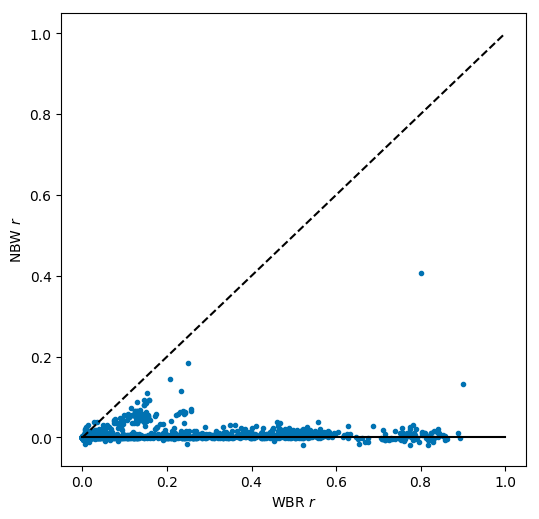

In [11]:
plt.figure(figsize=(6,6), dpi=100)
plt.plot(datas['beta_center_p001_100PCs']['WBR_'+kind], 
         datas['beta_center_p001_100PCs']['NBW_'+kind], '.')
plt.plot([0,1],[0,1],'k--')
plt.plot([0,1],[0,0],'k-')
plt.xlabel('WBR '+'$r$'), plt.ylabel('NBW '+'$r$')
plt.show()

In [12]:
npzs = glob.glob('/oak/stanford/groups/mrivas/projects/degas-risk/datasets/all_pop/tsvd/*.npz')
print('\n'.join(map(os.path.basename,npzs)))

all_z_center_p001_20190621_500PCs.npz
all_beta_center_p001_20190621_500PCs.npz
all_beta_nonCenter_p1e-05_20190621_500PCs.npz
all_beta_center_p001_20190530_500PCs.npz
all_beta_center_p0001_20190621_500PCs.npz
all_z_center_p1e-05_20190621_500PCs.npz
all_beta_center_p1e-05_20190621_500PCs.npz
all_z_center_p00001_20190621_500PCs.npz
all_beta_center_p1e-06_20190621_500PCs.npz
all_beta_nonCenter_p00001_20190621_500PCs.npz
all_z_center_p0001_20190621_500PCs.npz
all_z_nonCenter_p001_20190530_500PCs.npz
all_z_center_p1e-06_20190621_500PCs.npz
all_beta_nonCenter_p1e-06_20190621_500PCs.npz
all_beta_nonCenter_p0001_20190621_500PCs.npz
all_beta_center_p00001_20190621_500PCs.npz
all_beta_nonCenter_p001_20190621_500PCs.npz


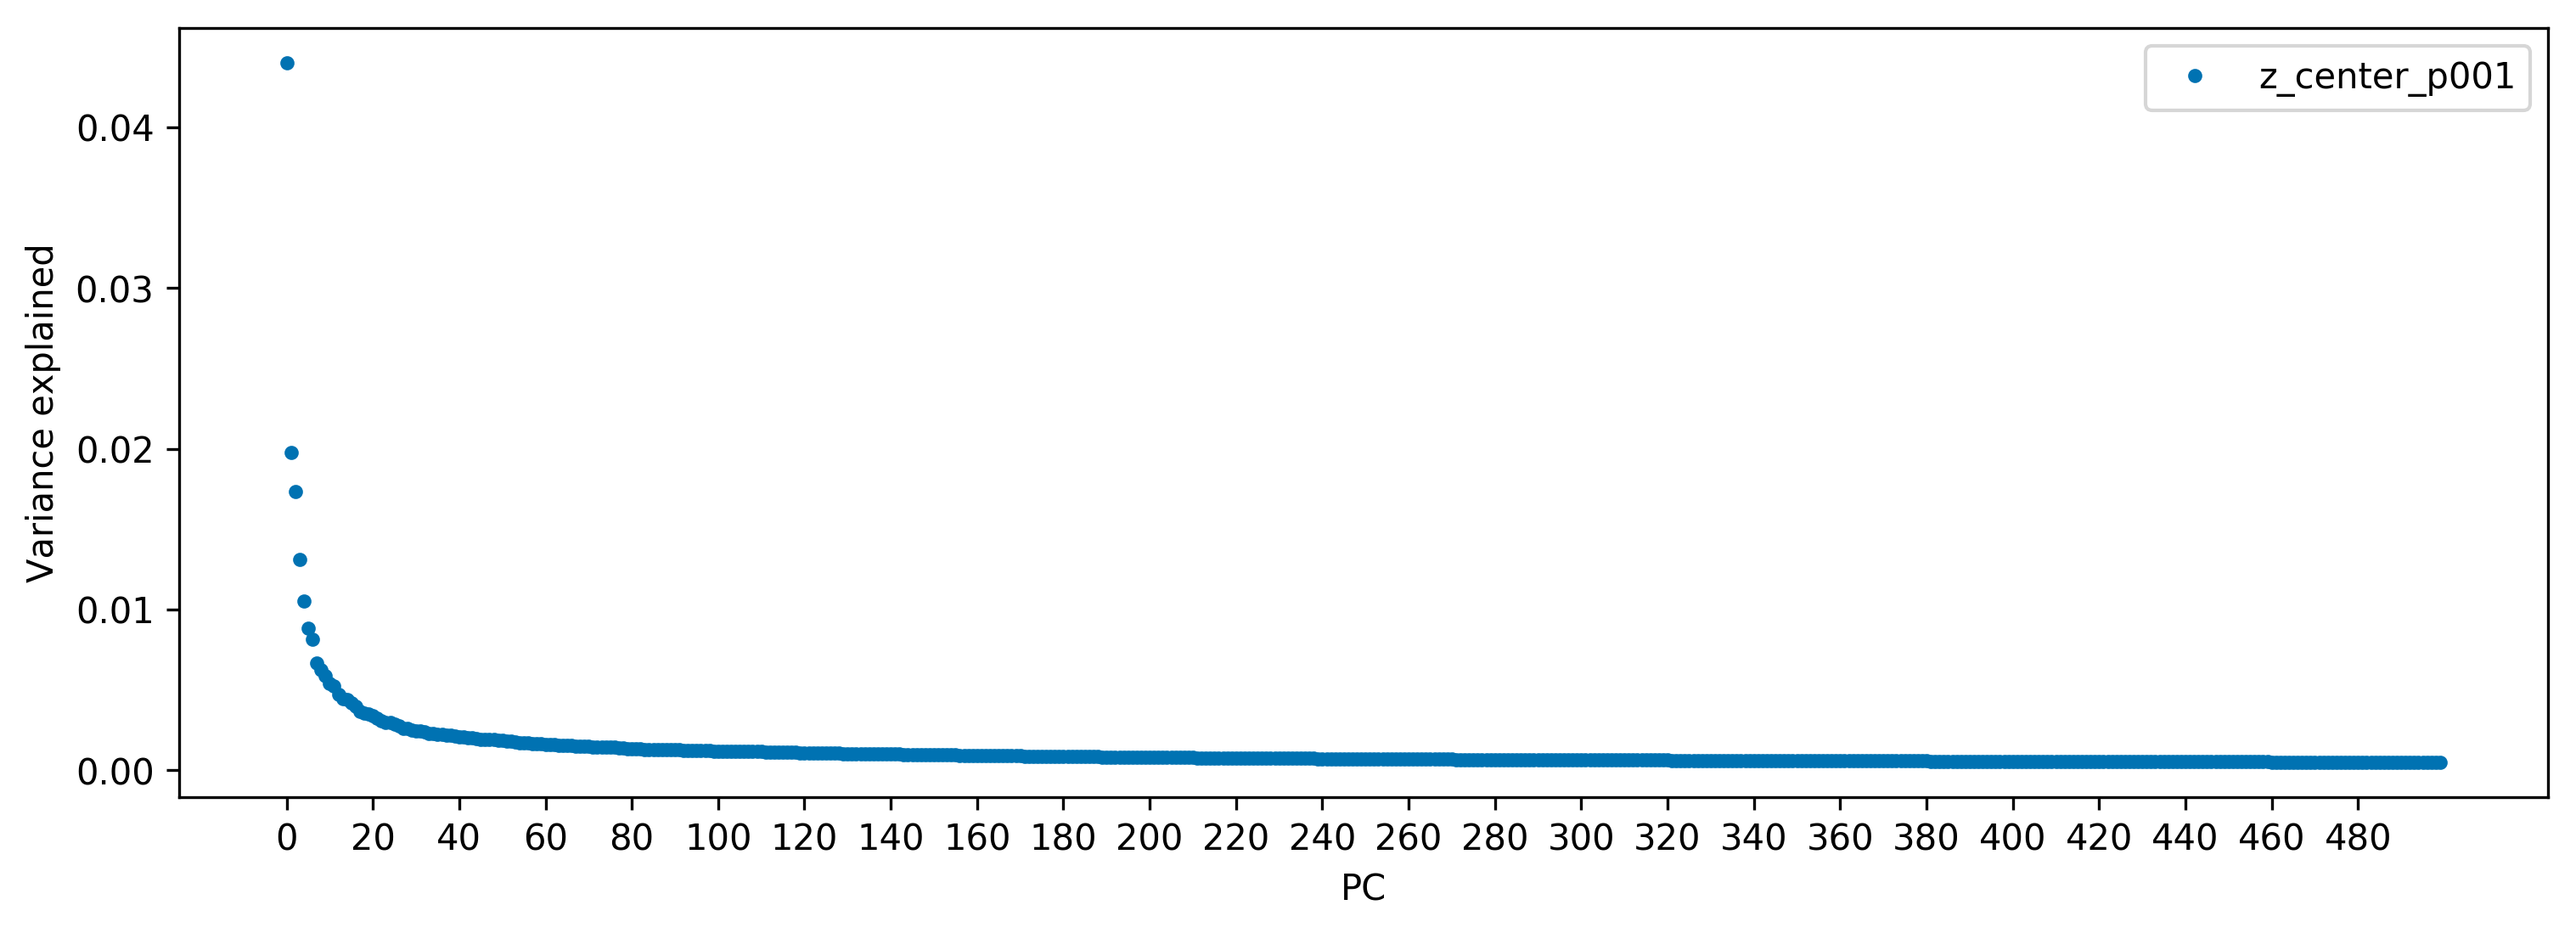

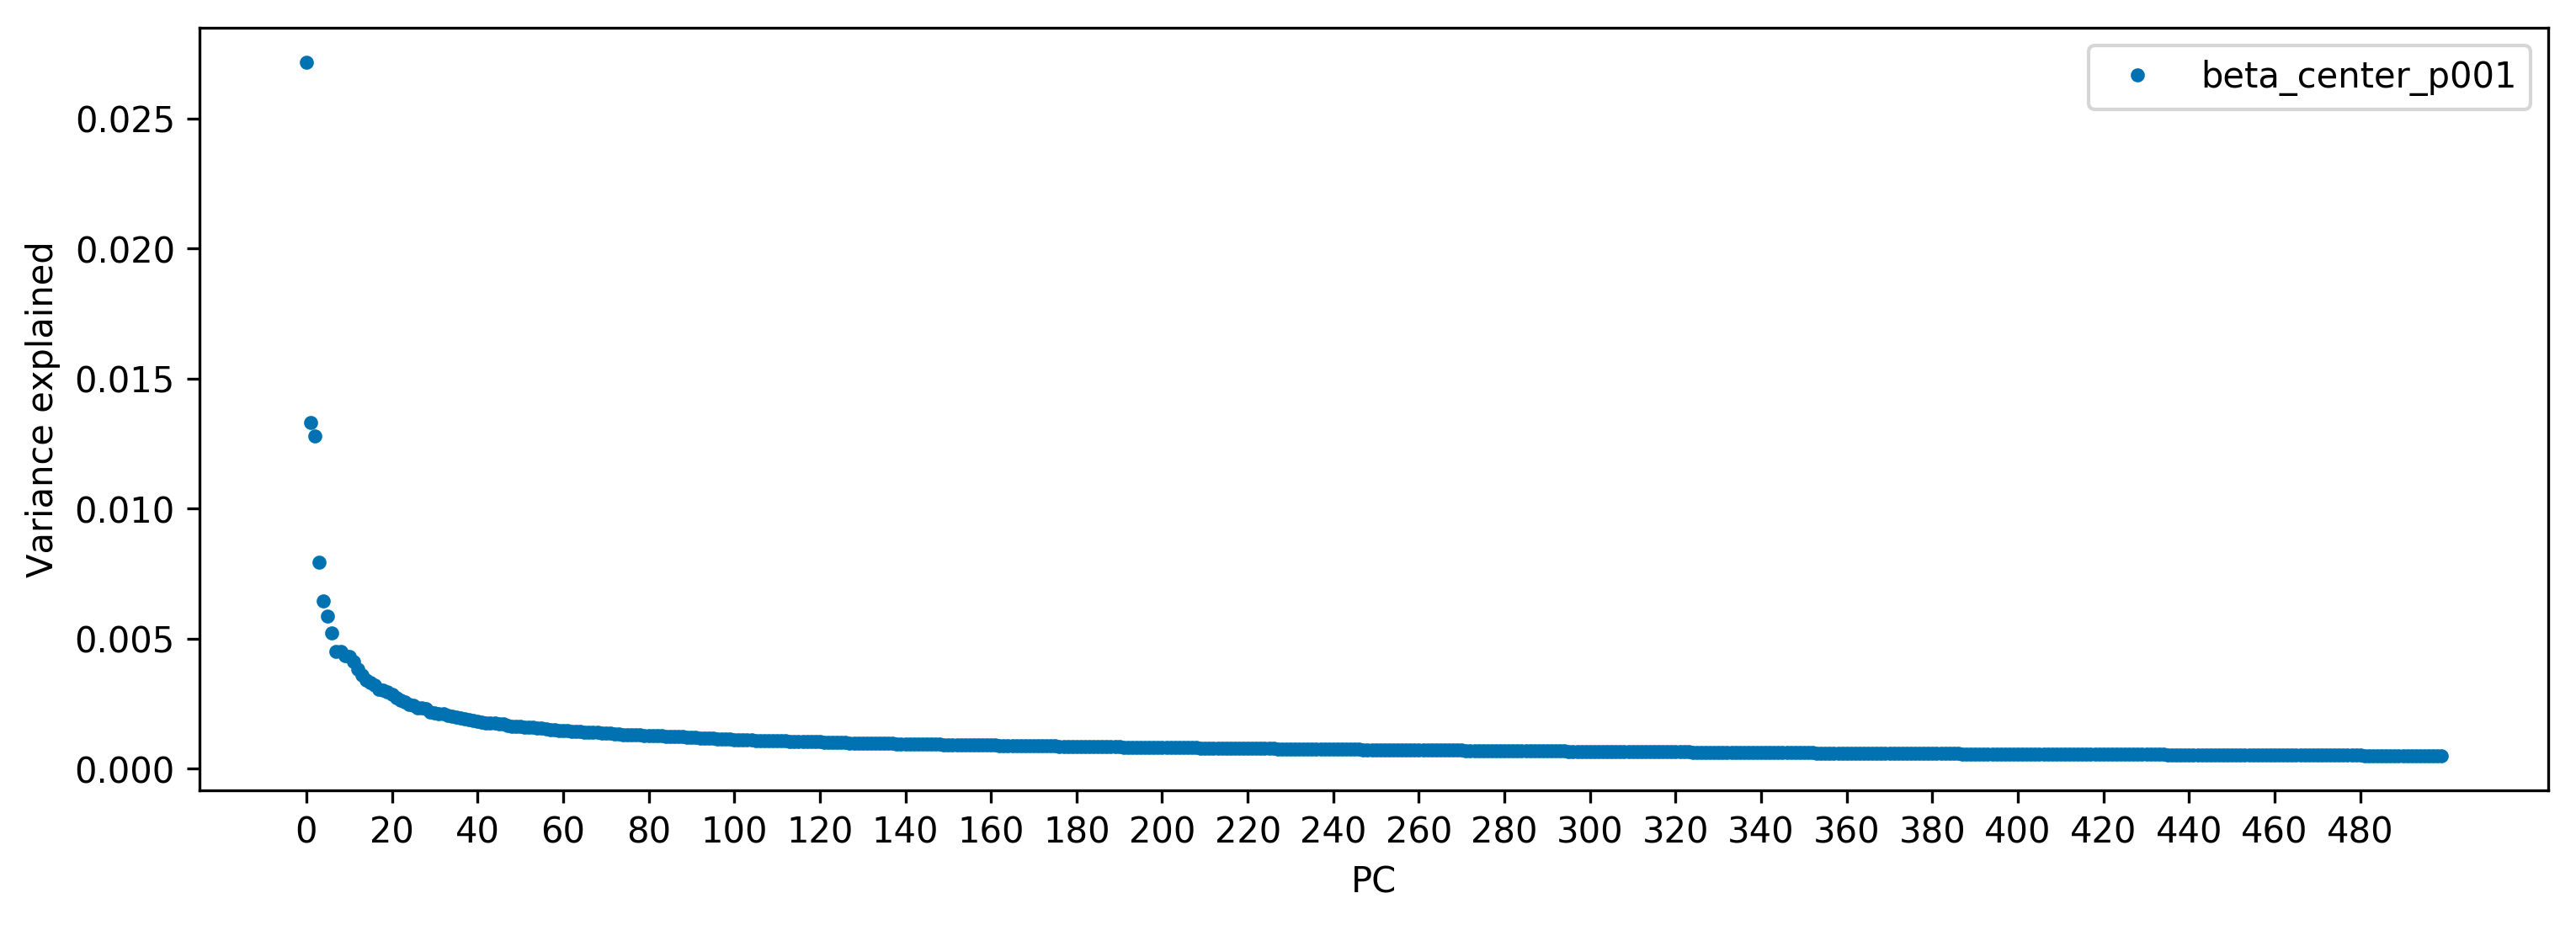

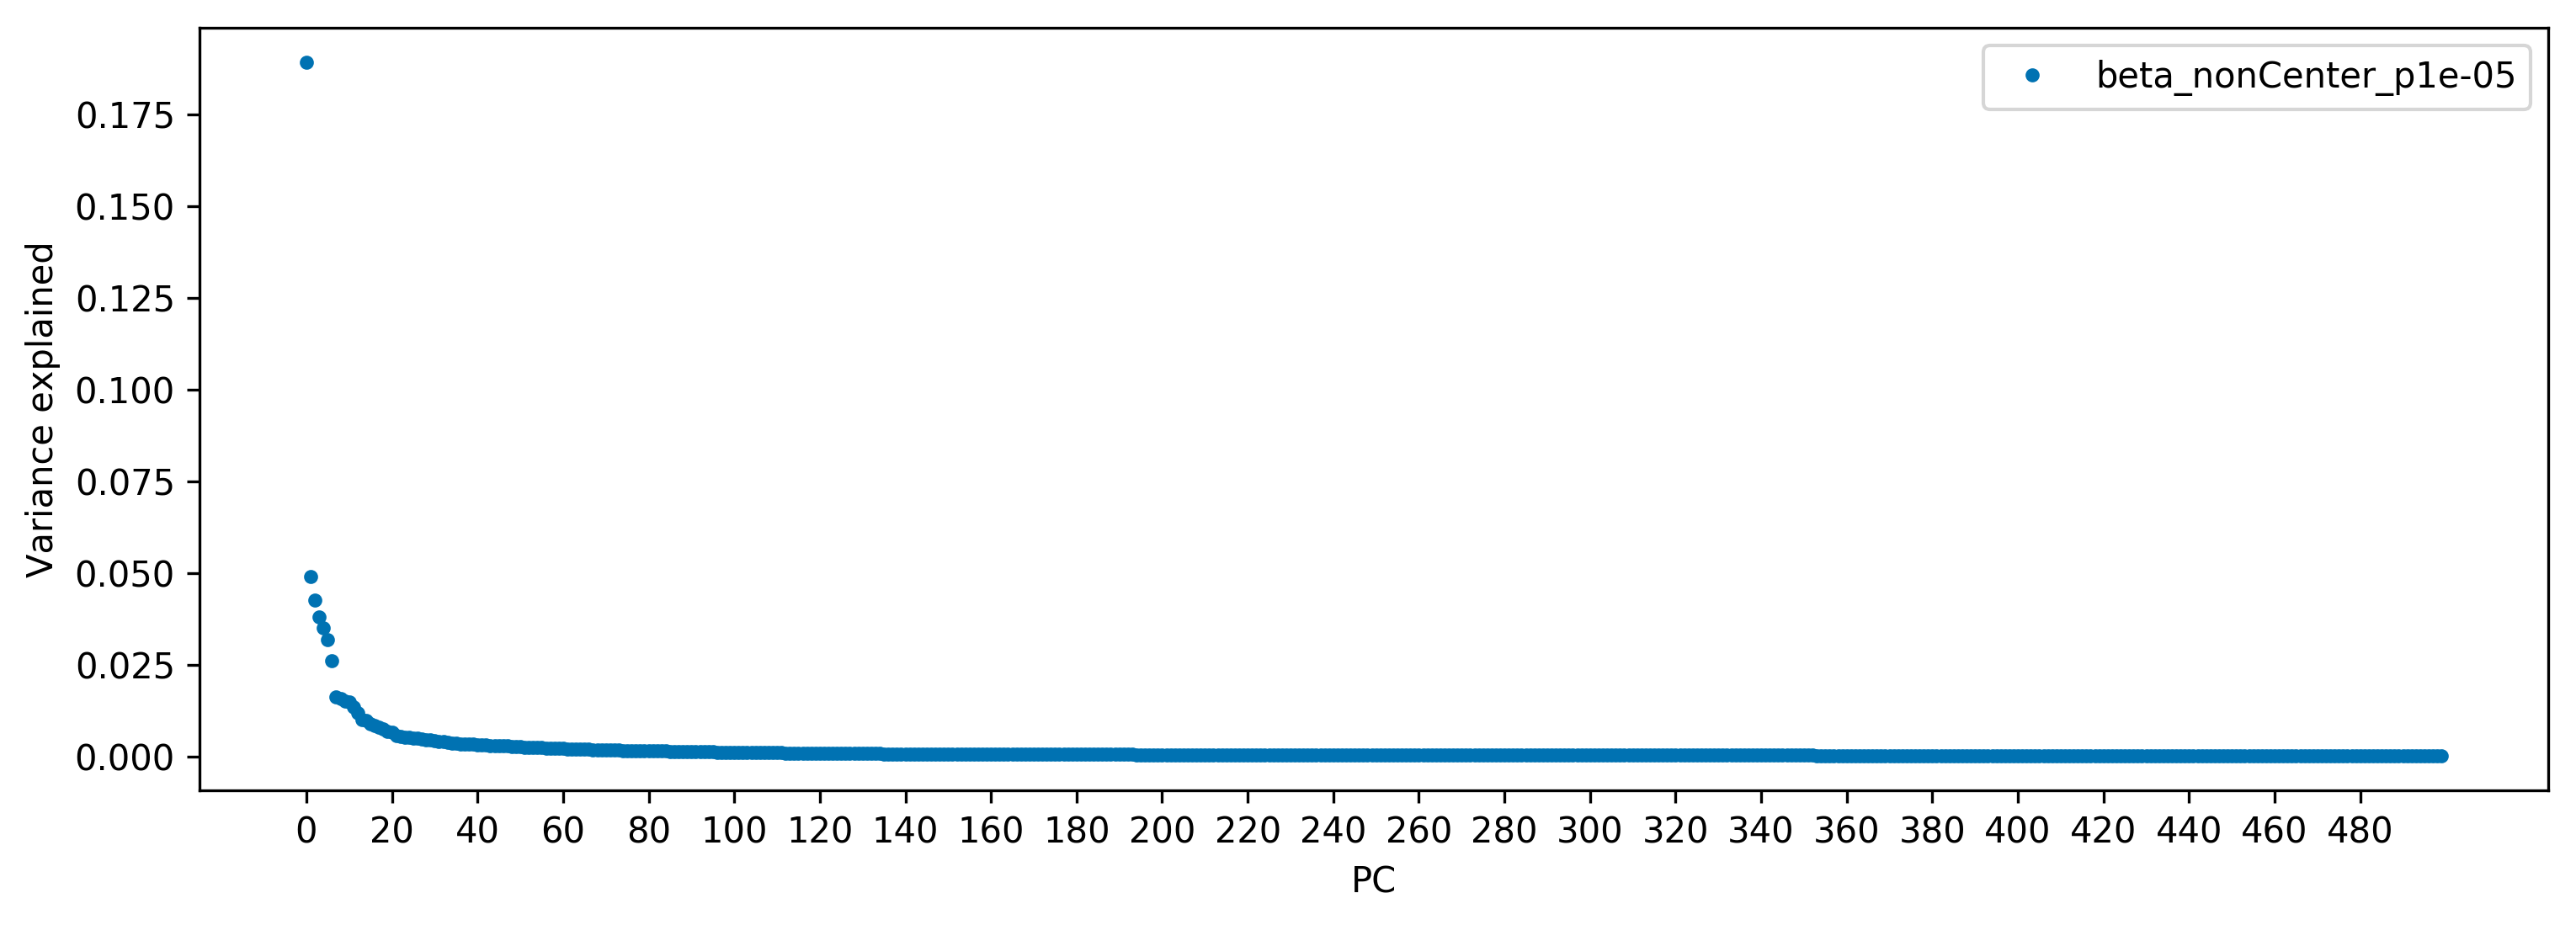

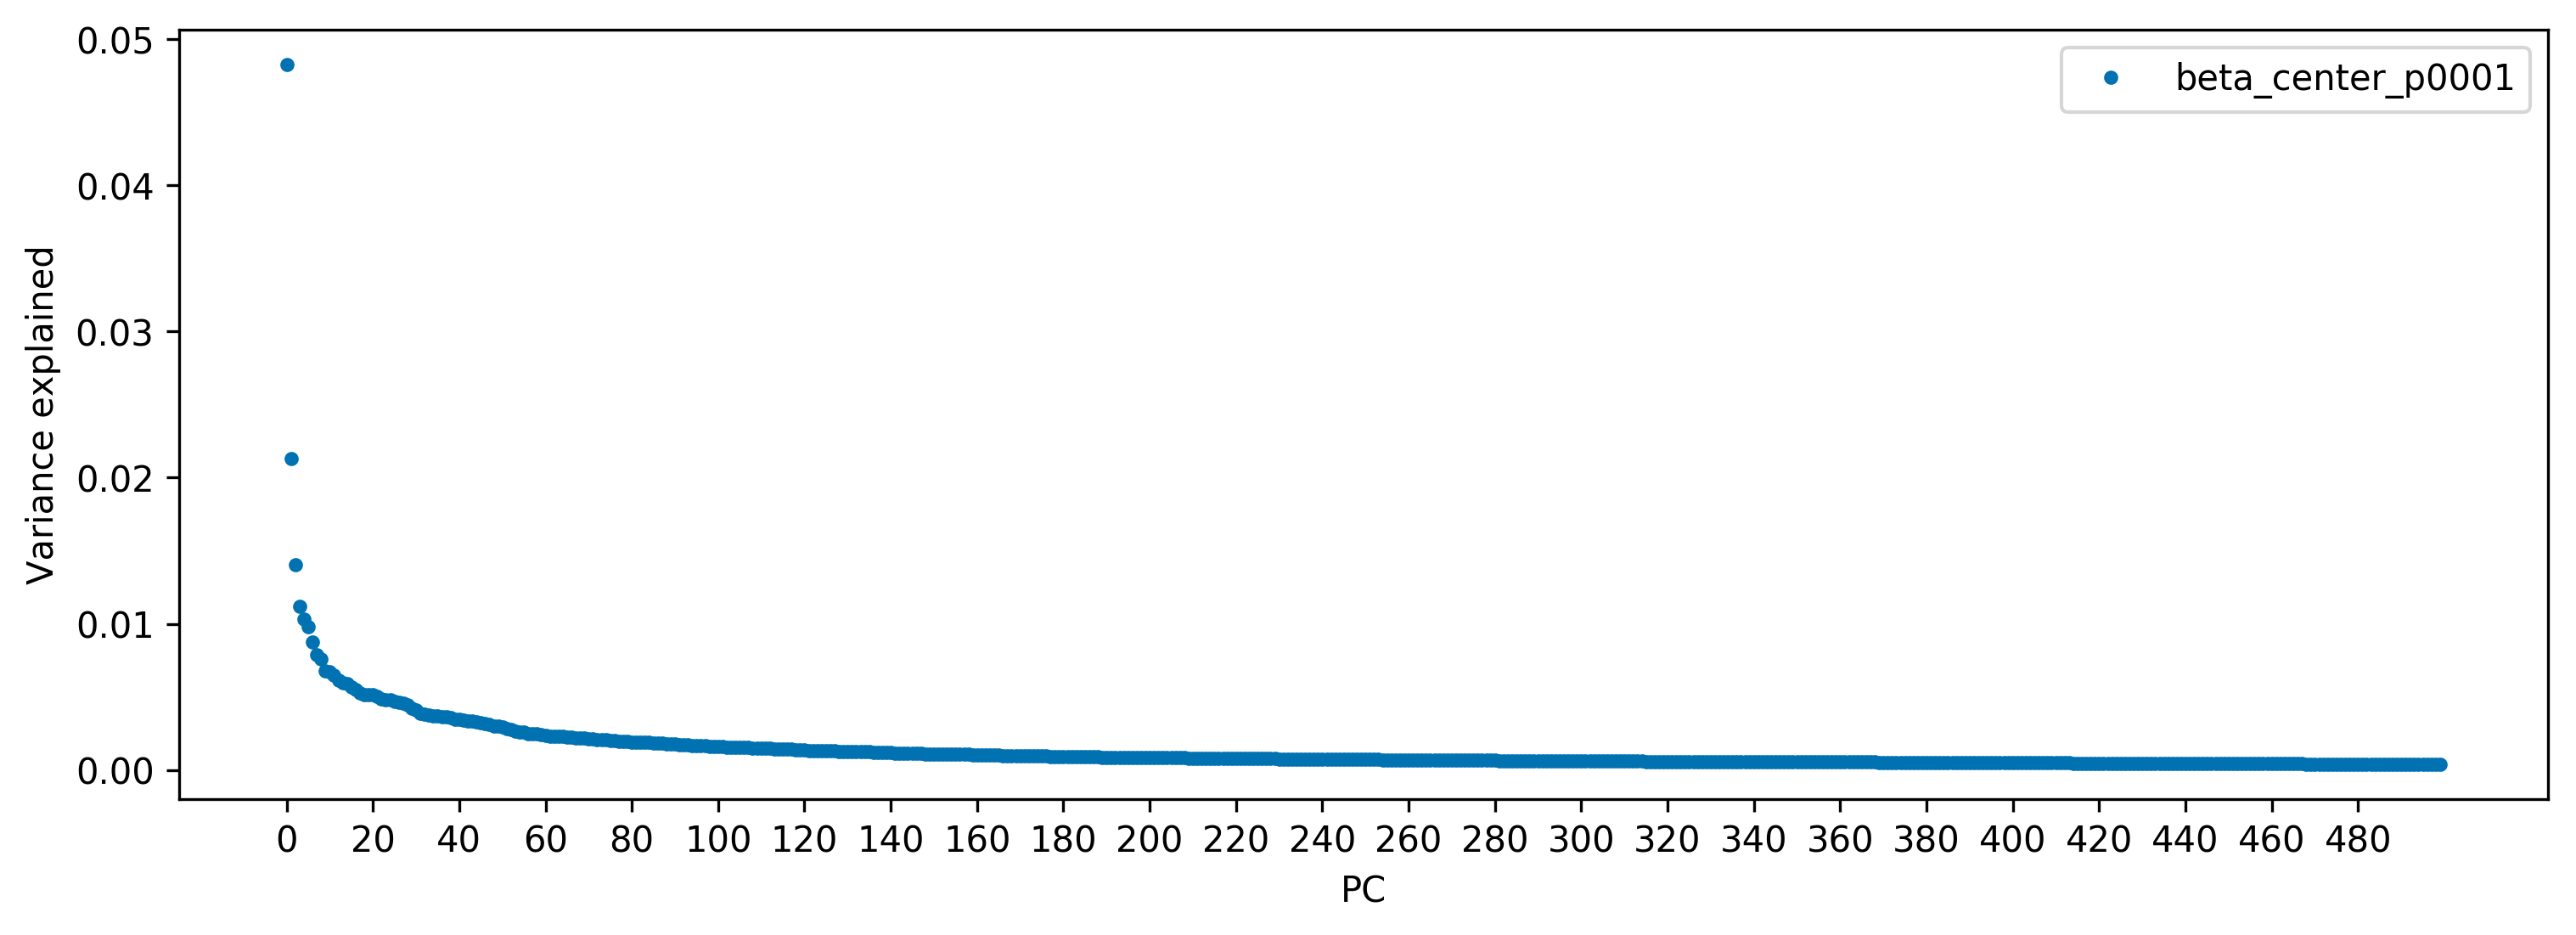

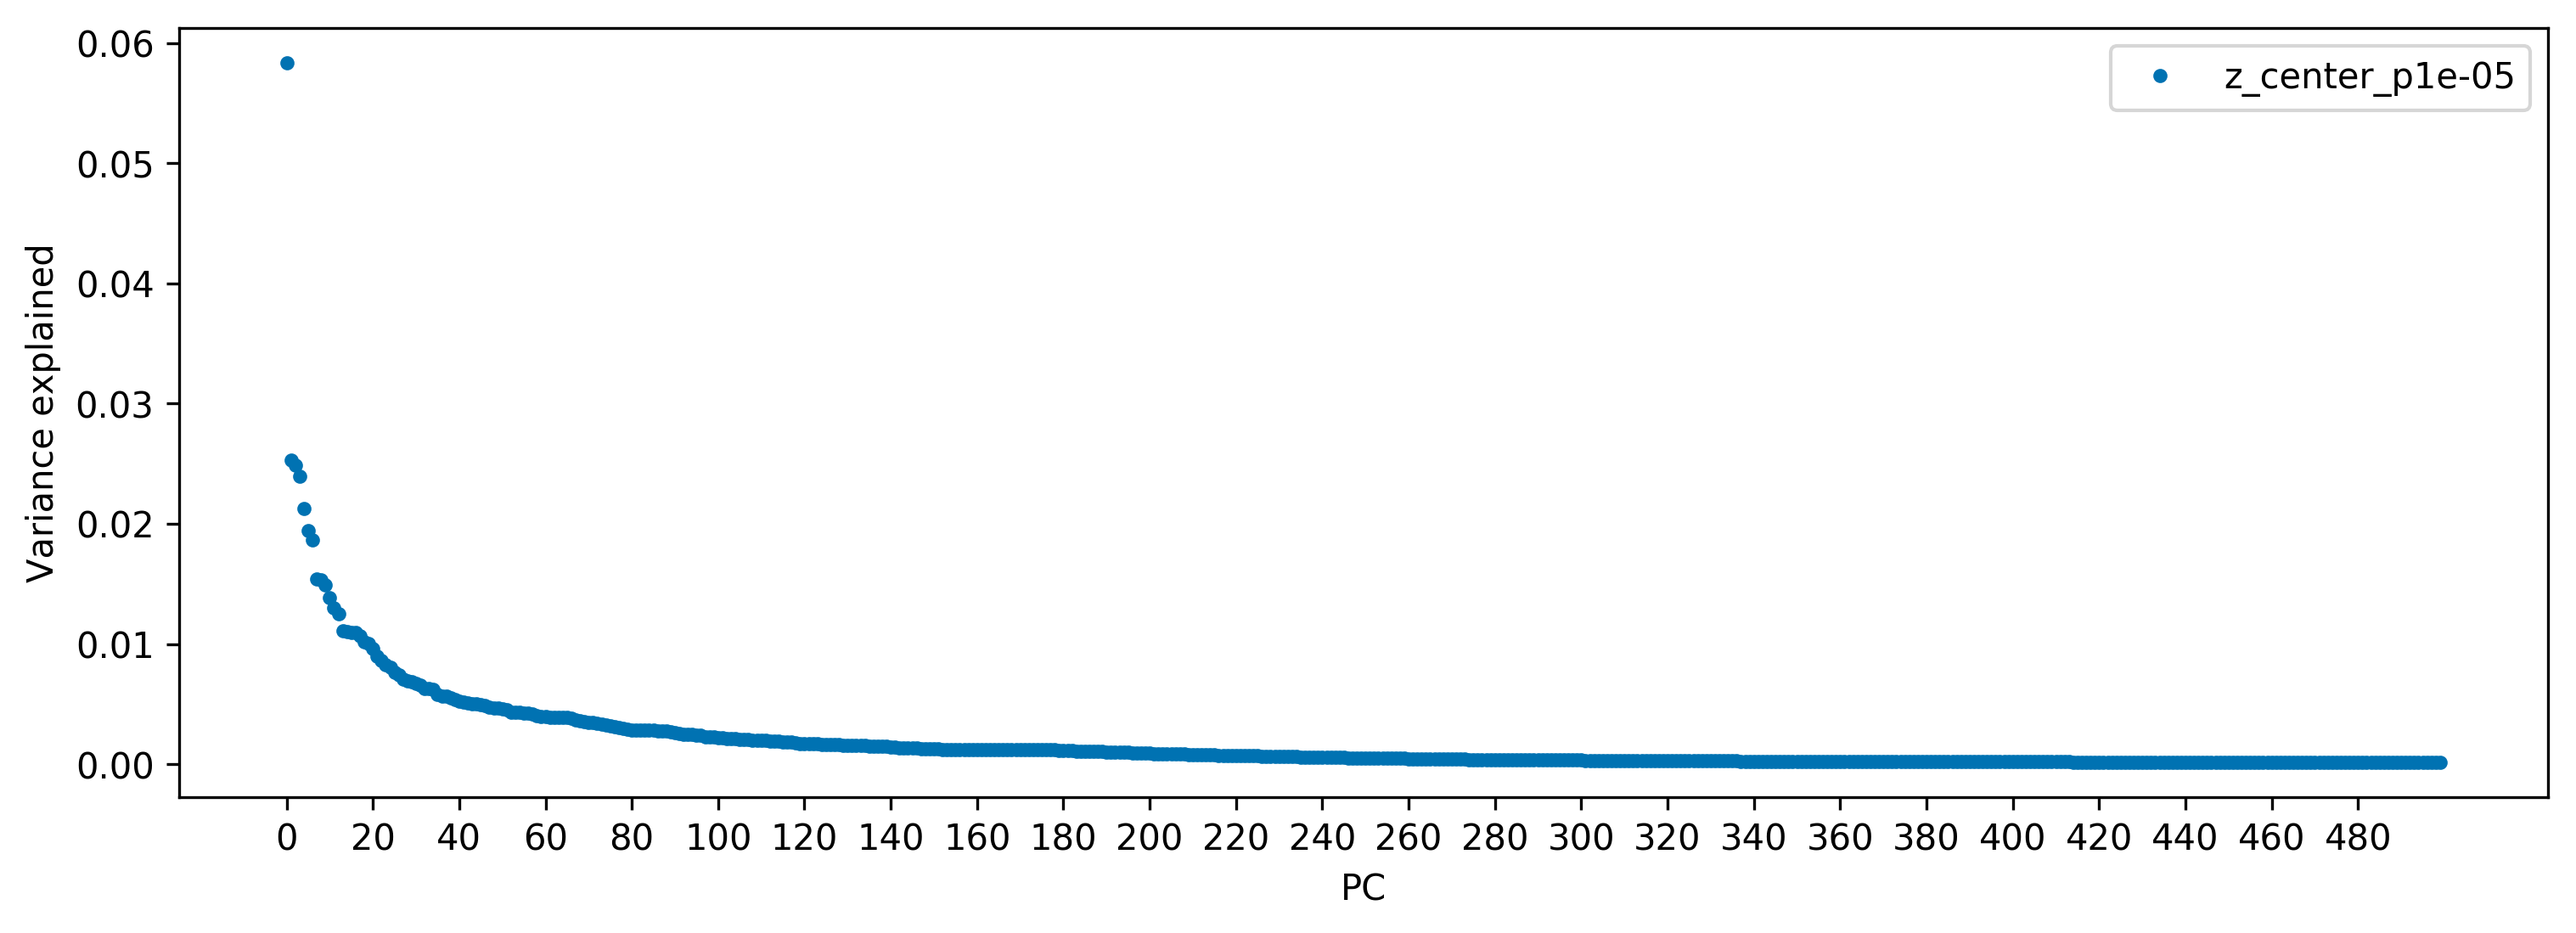

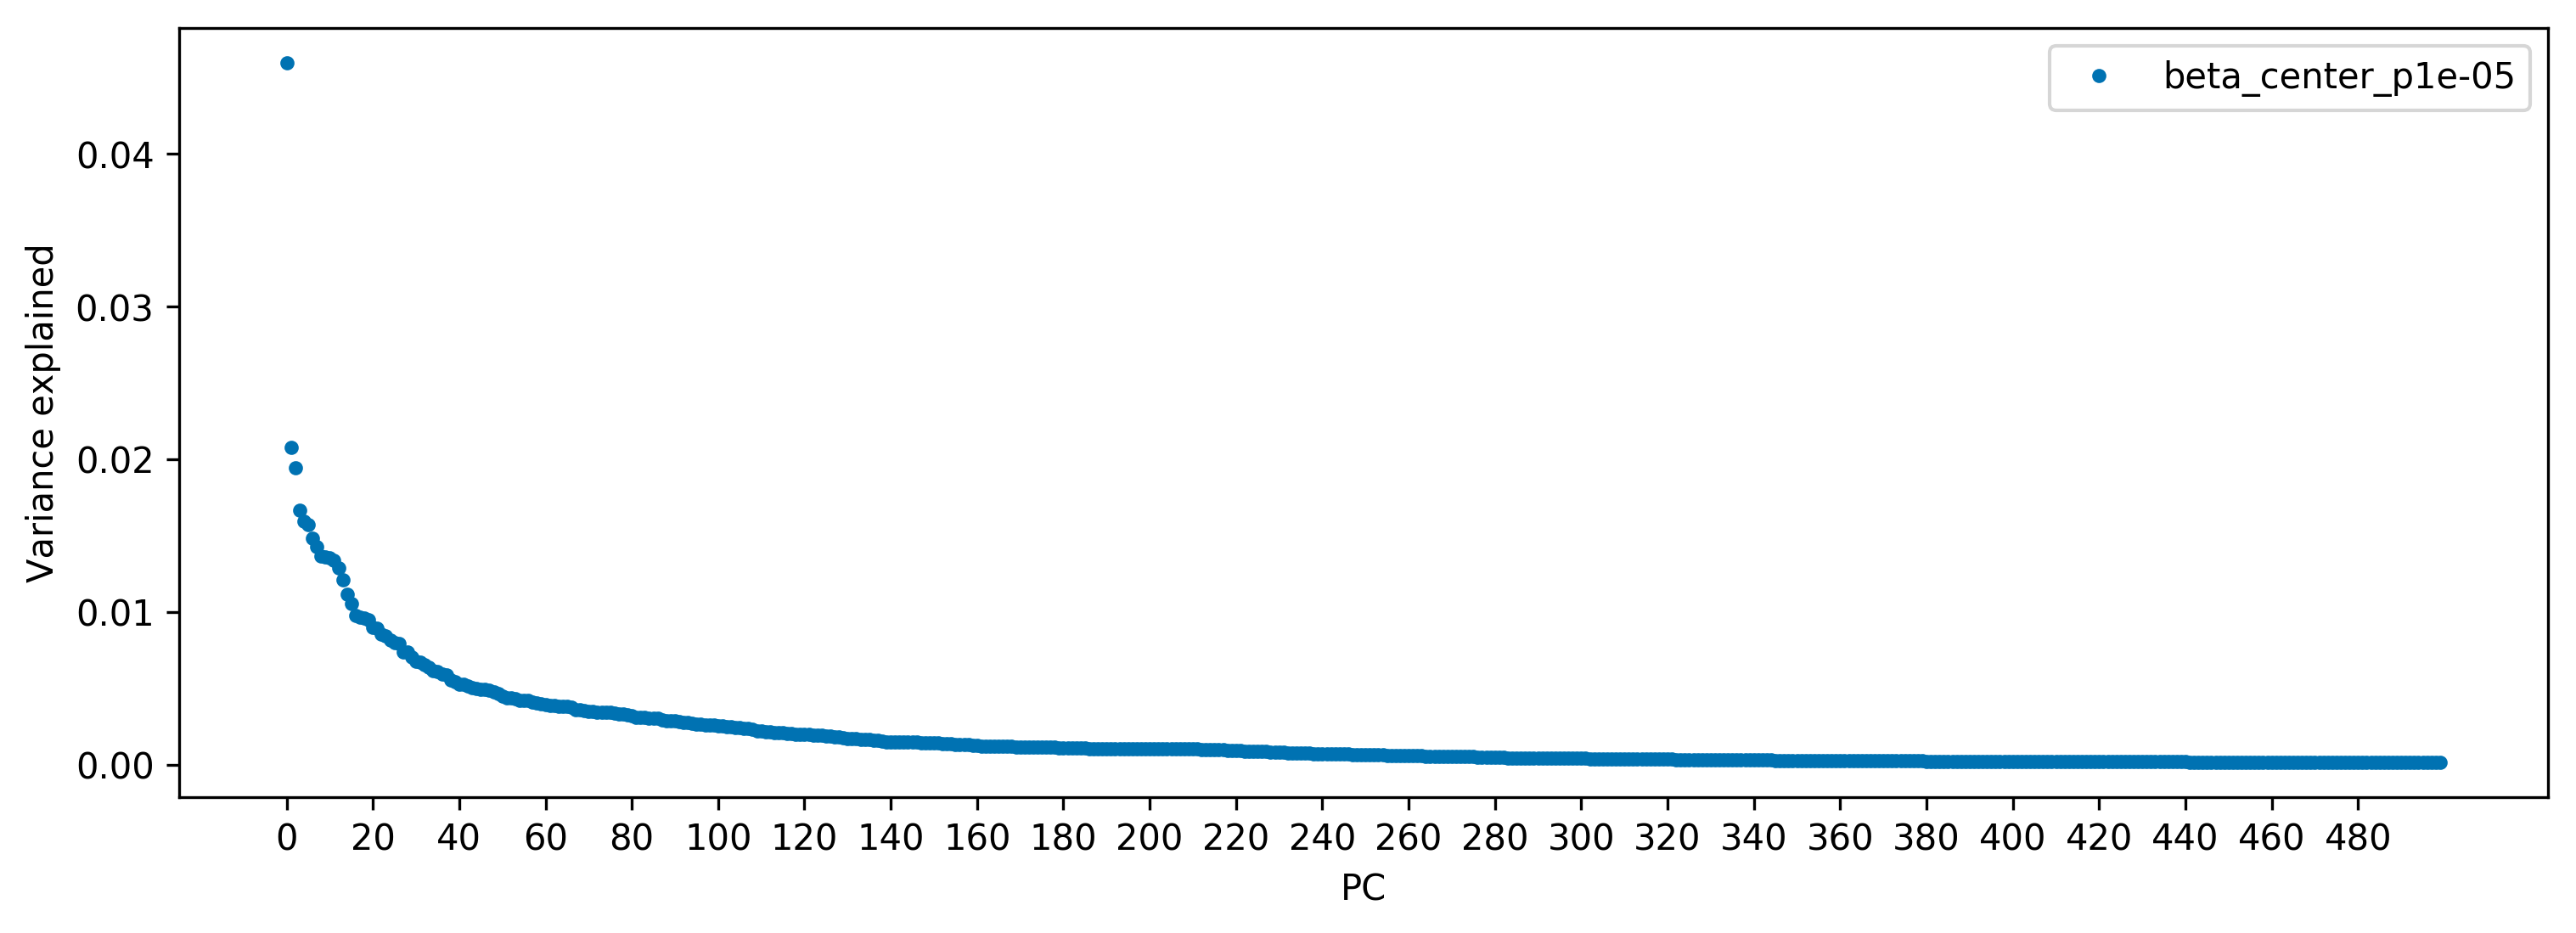

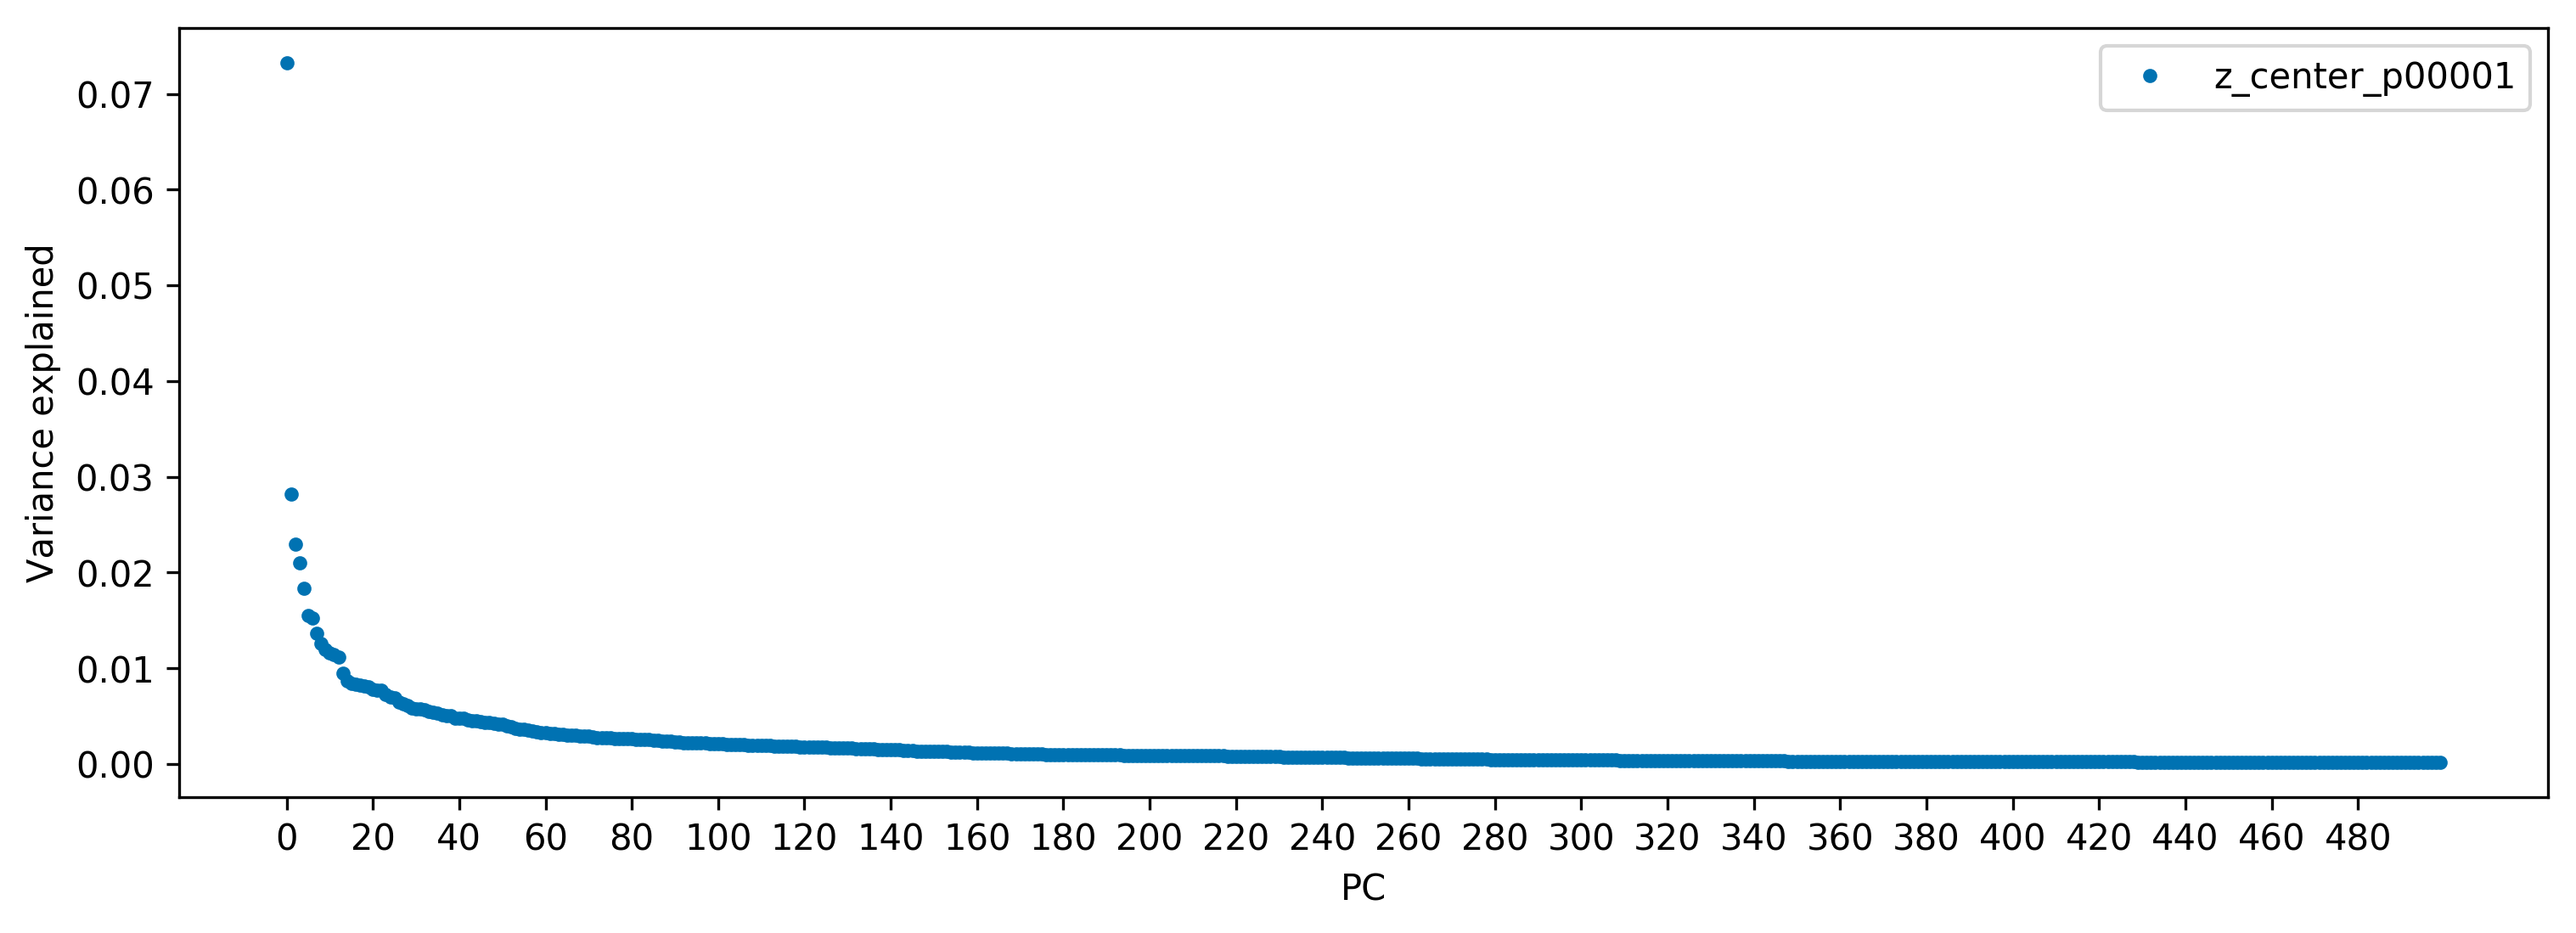

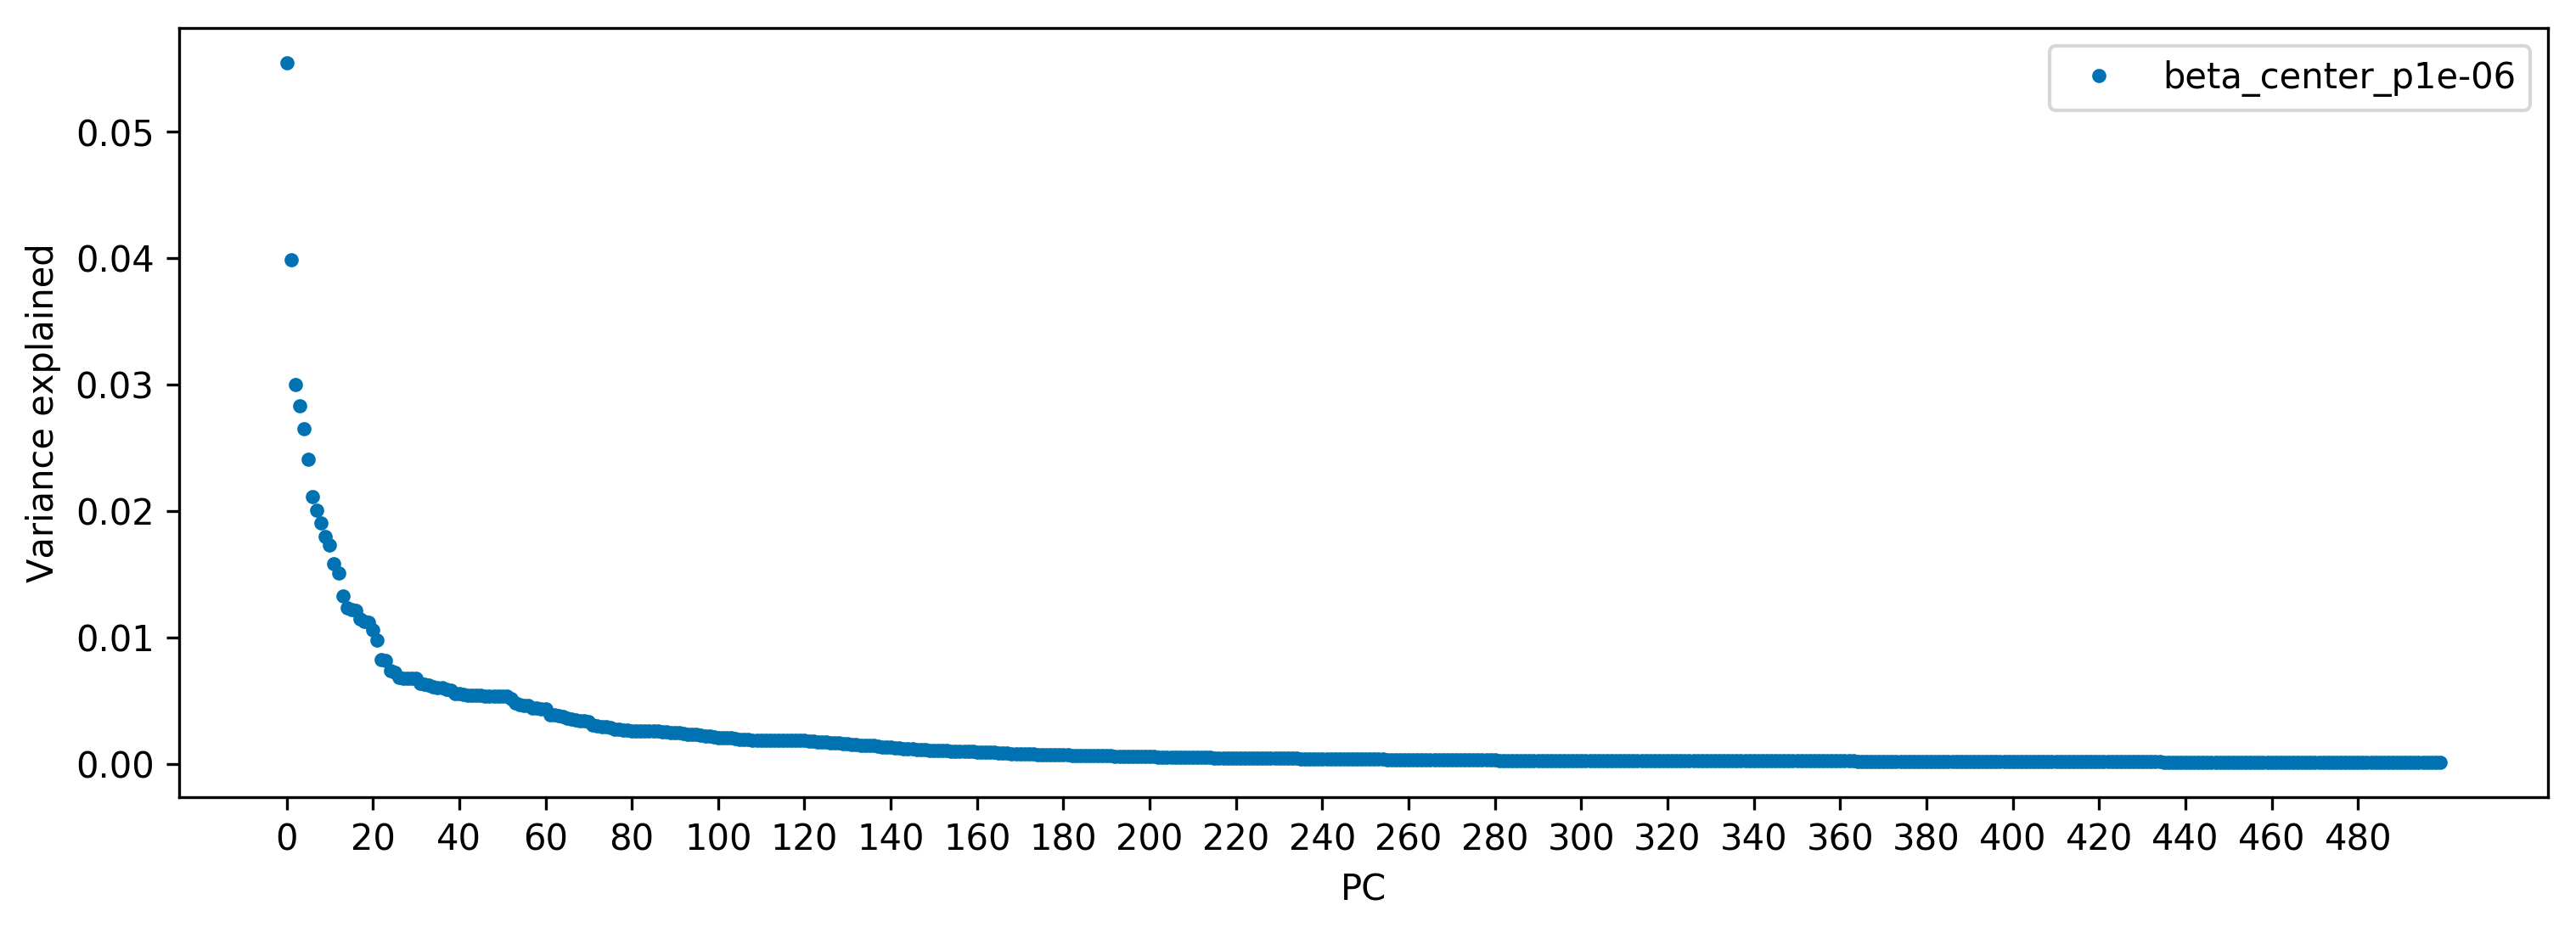

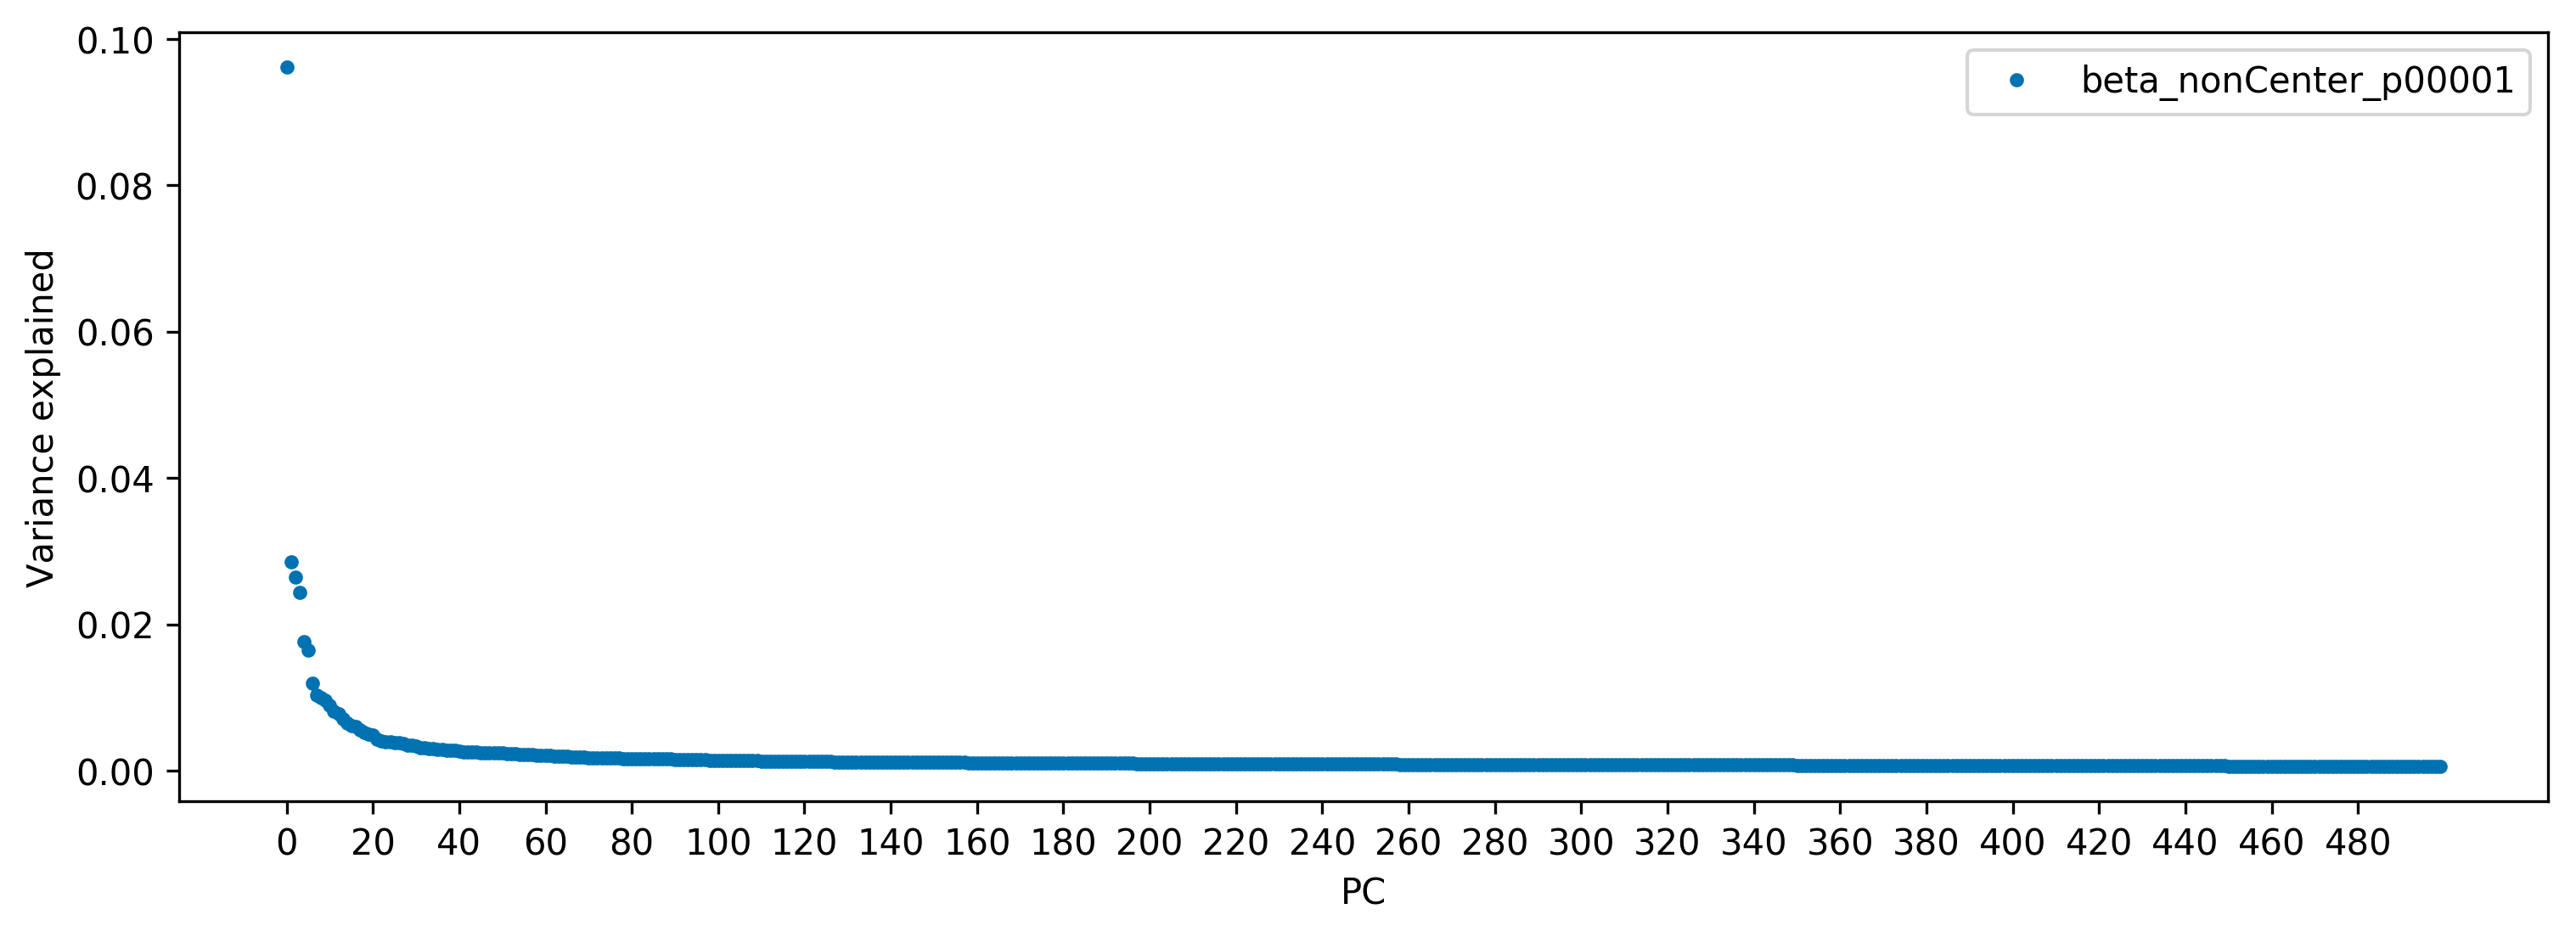

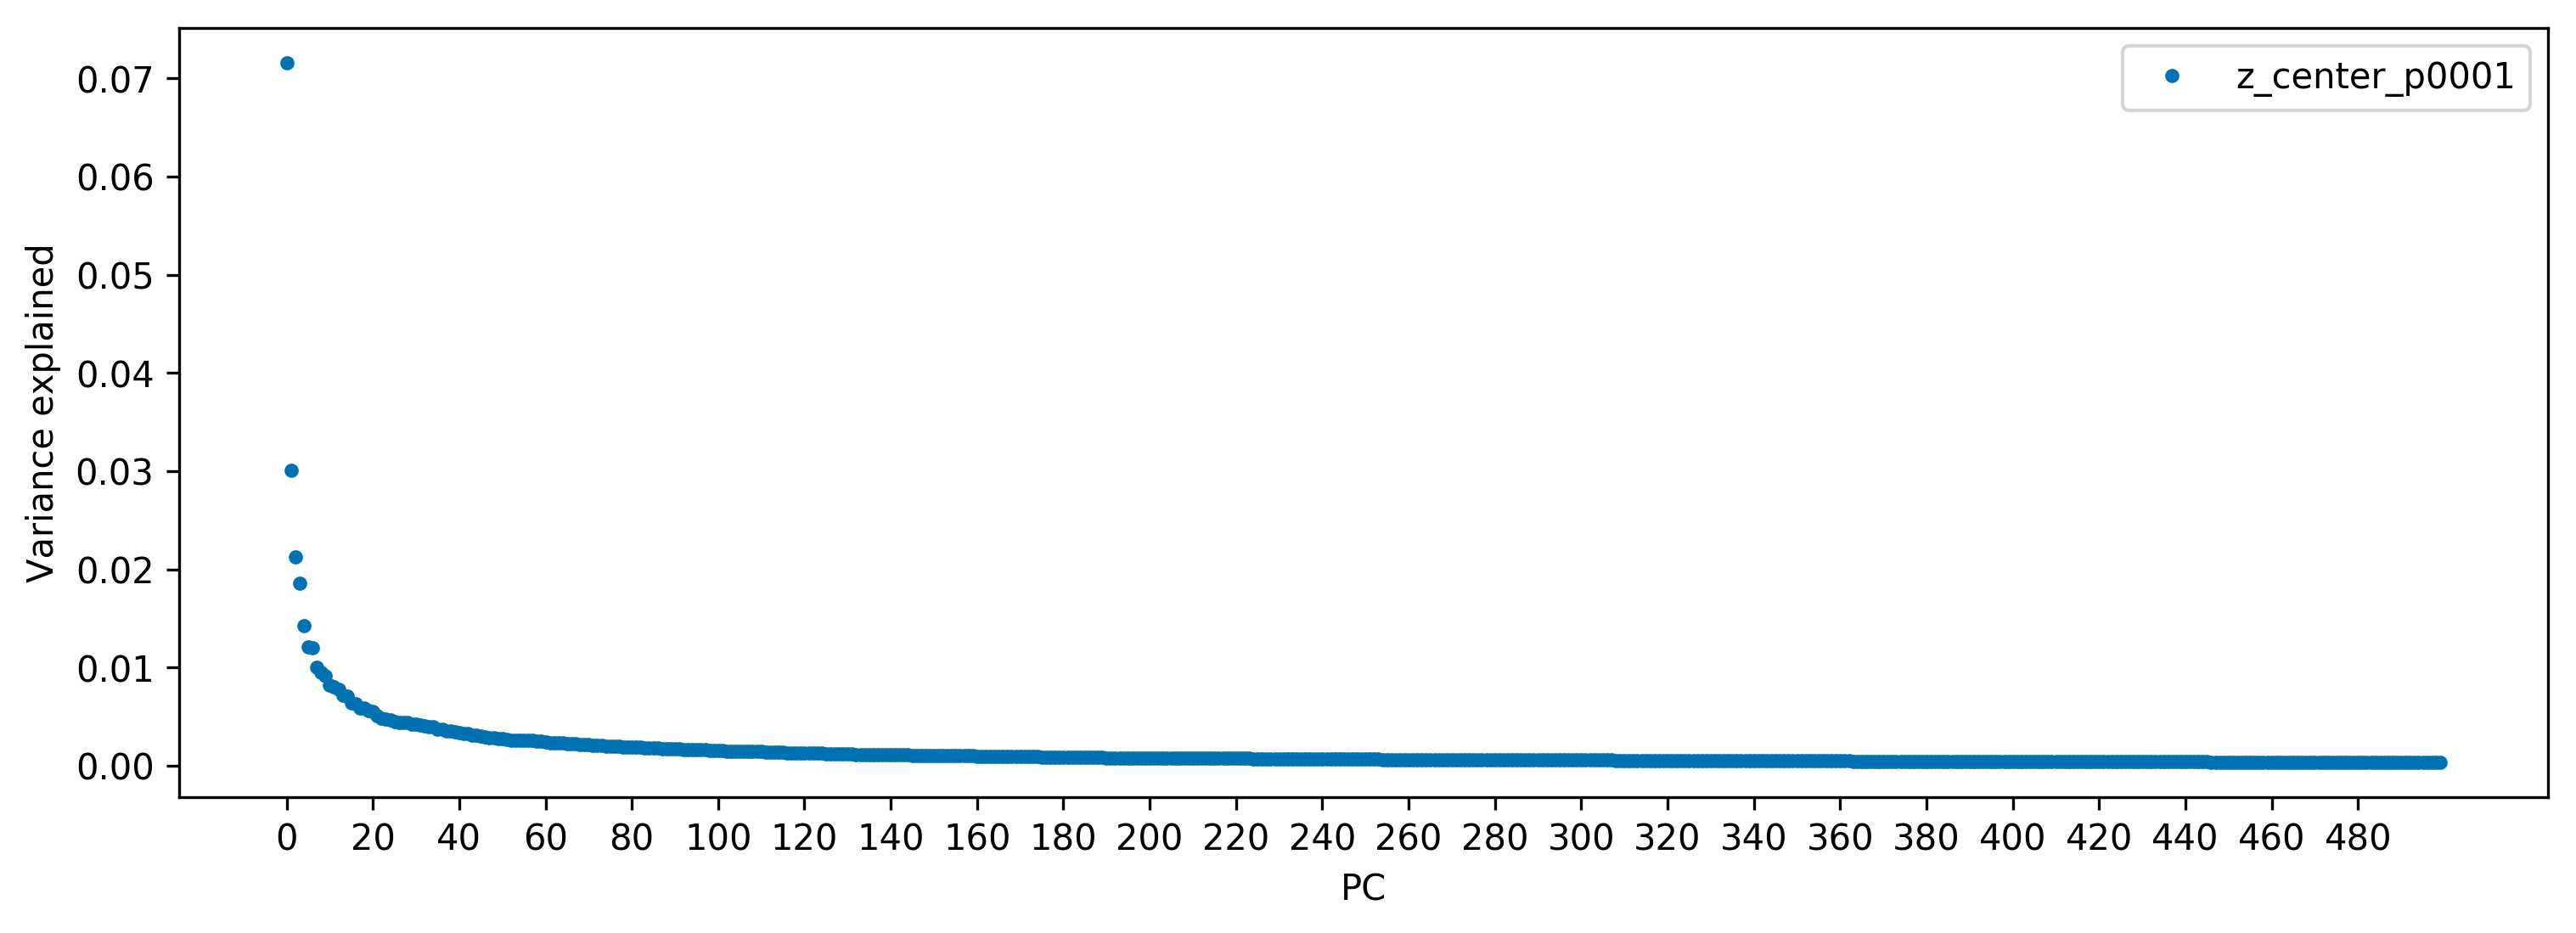

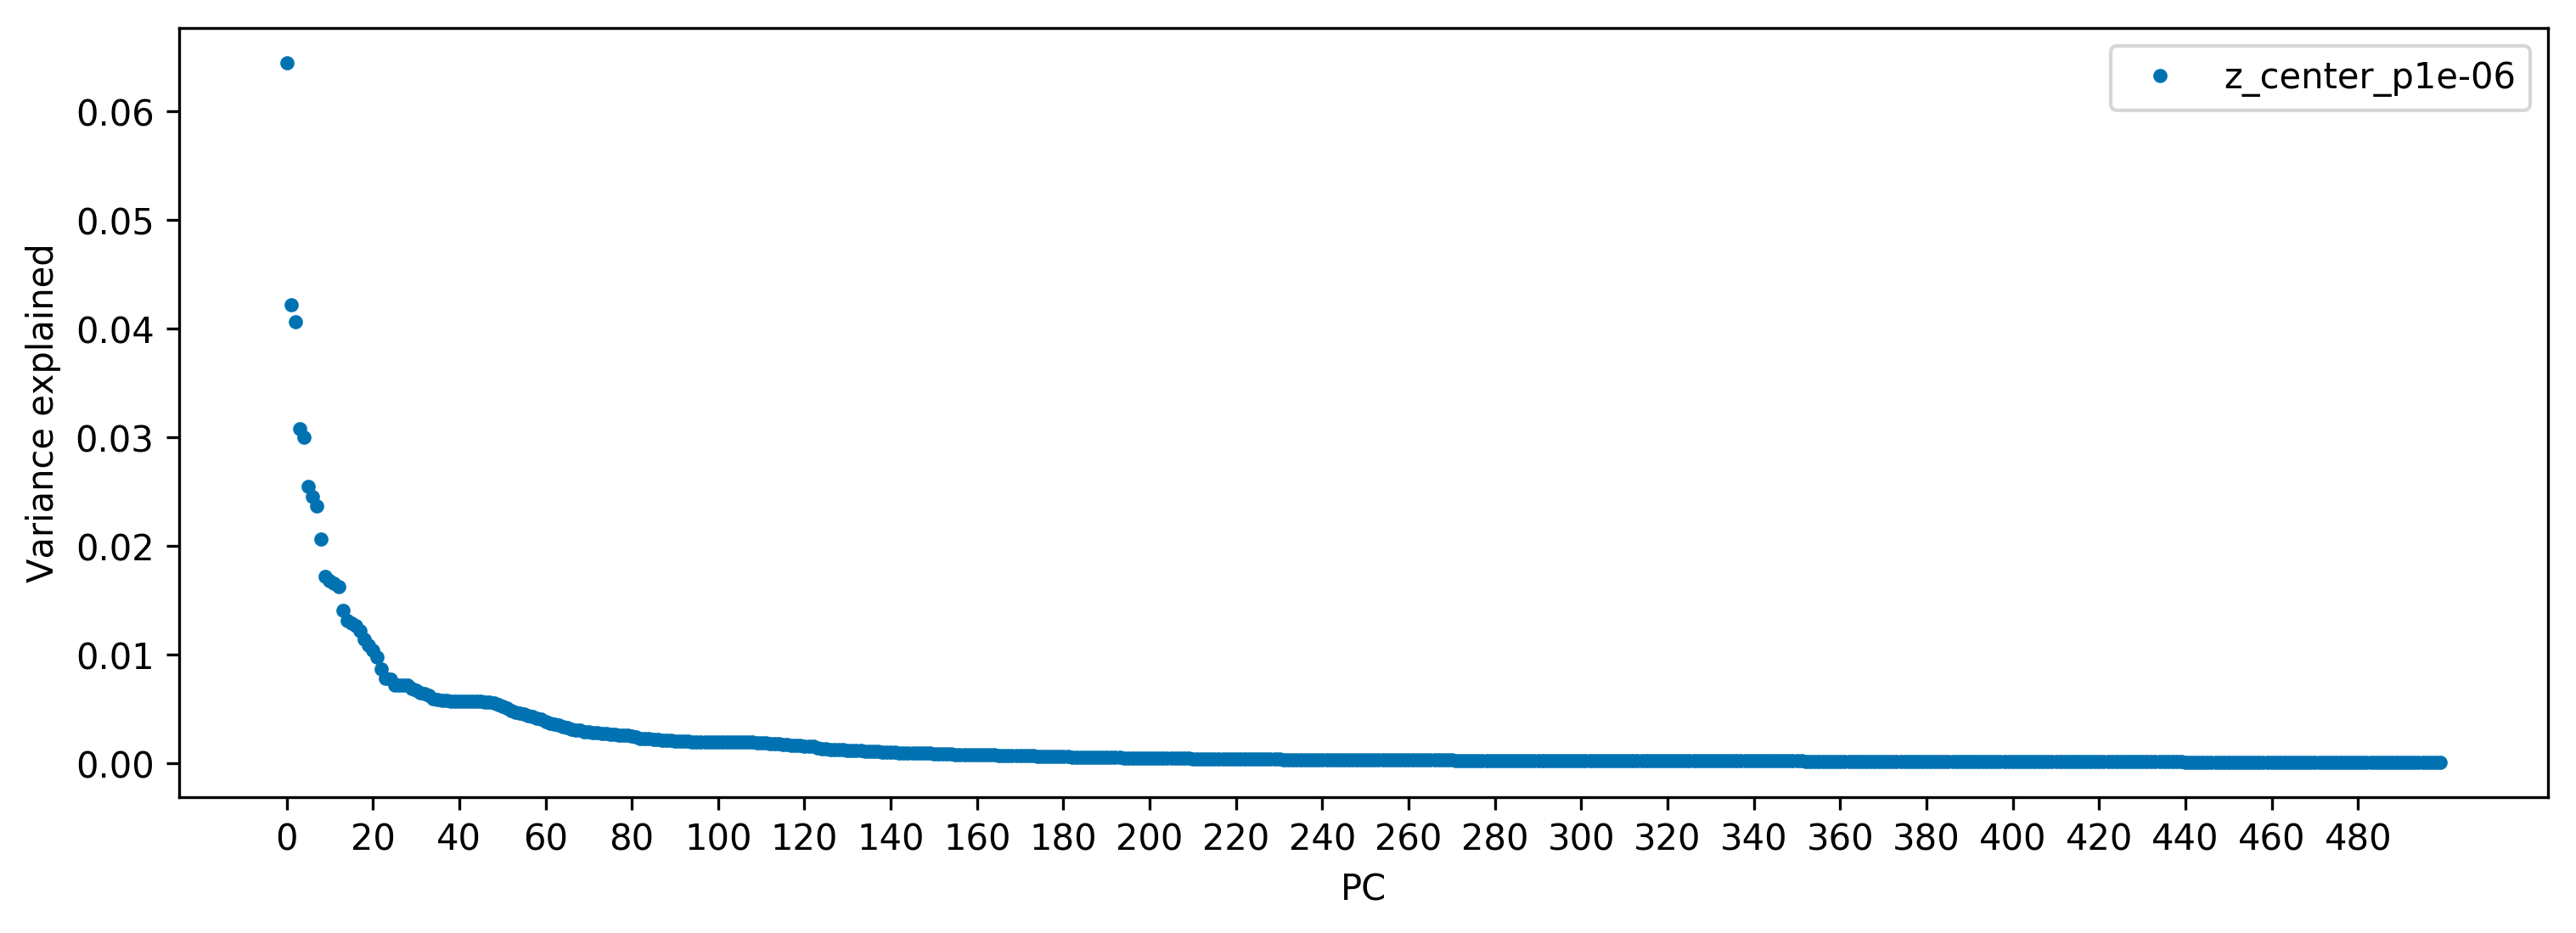

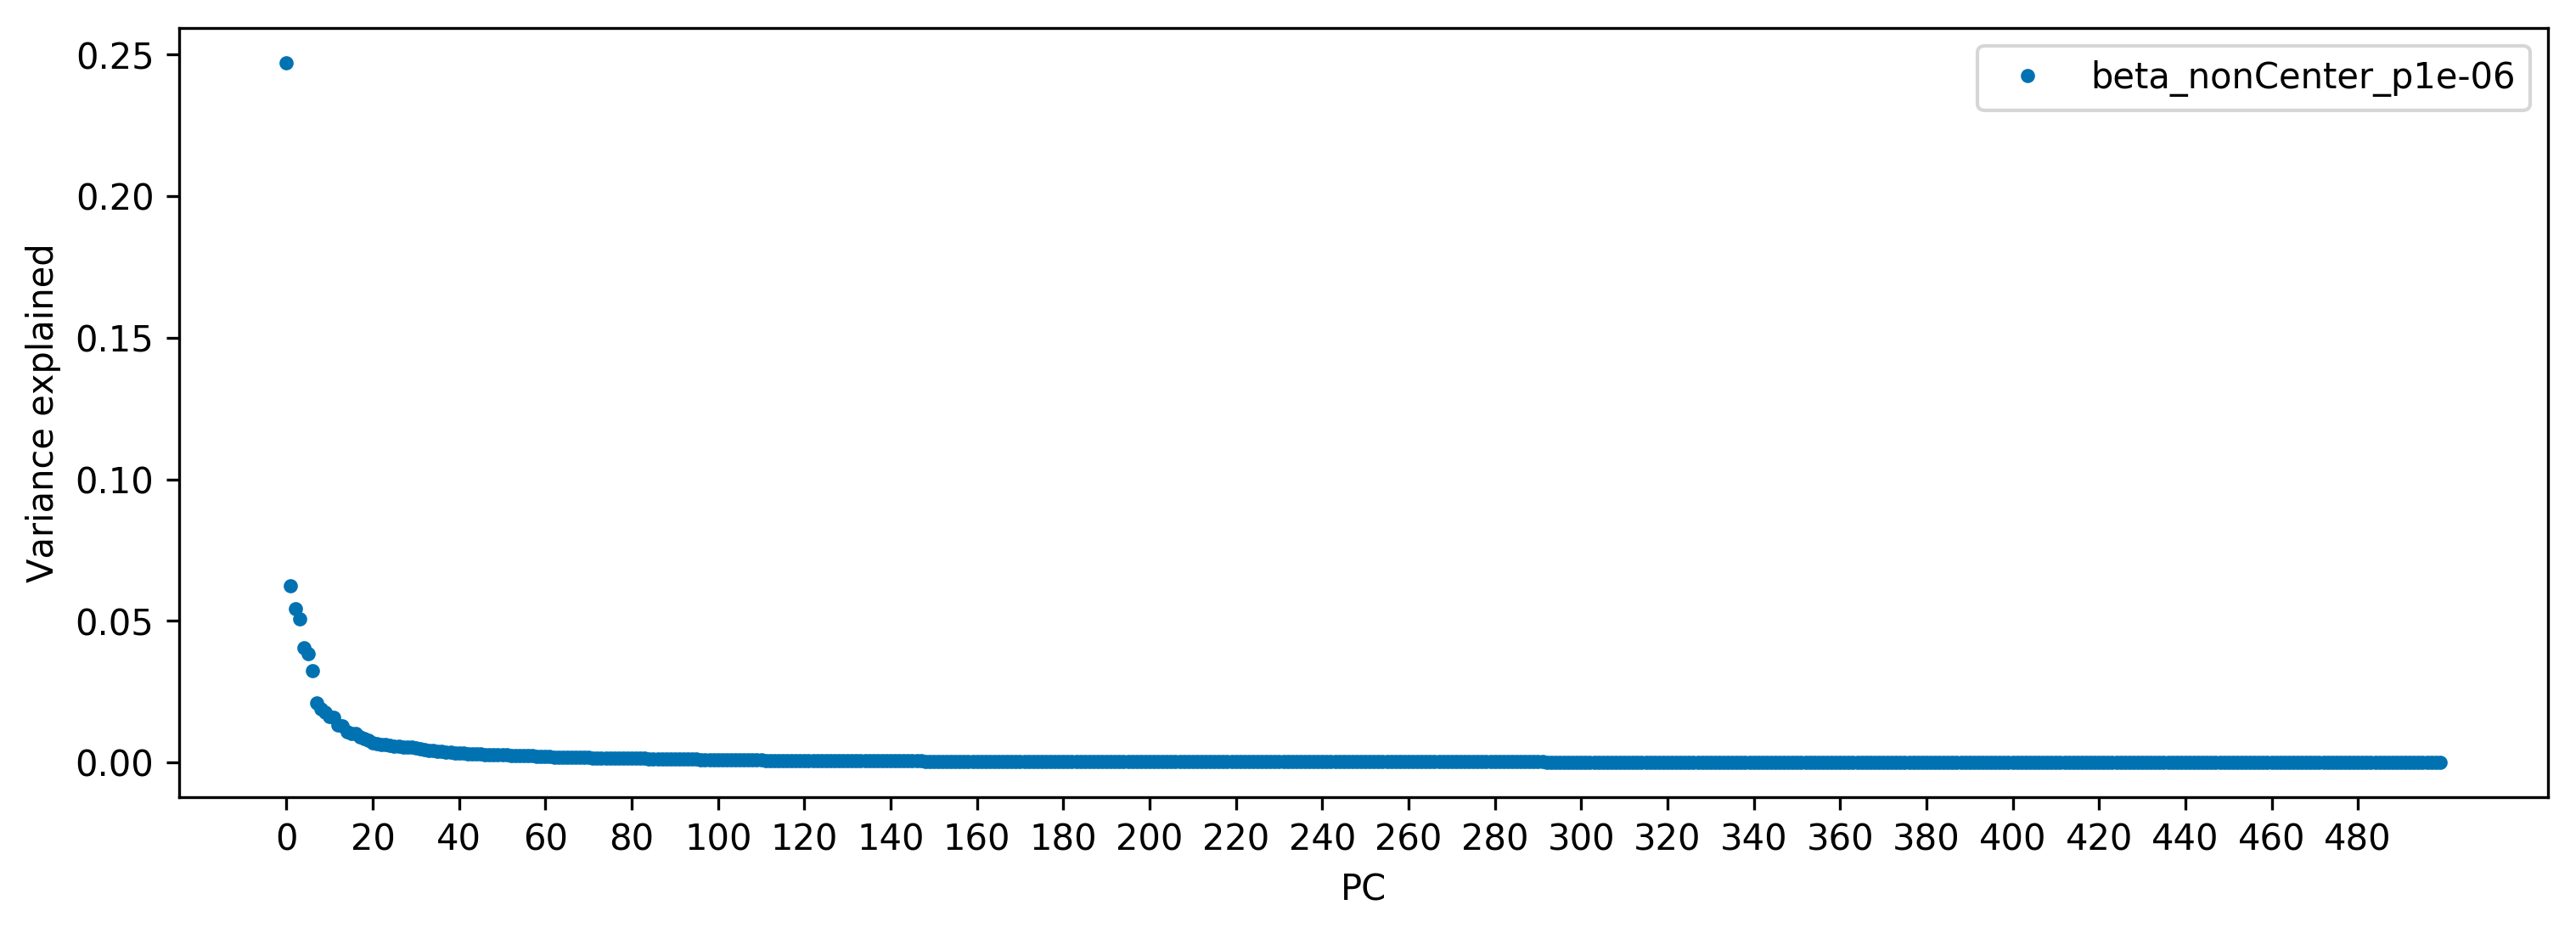

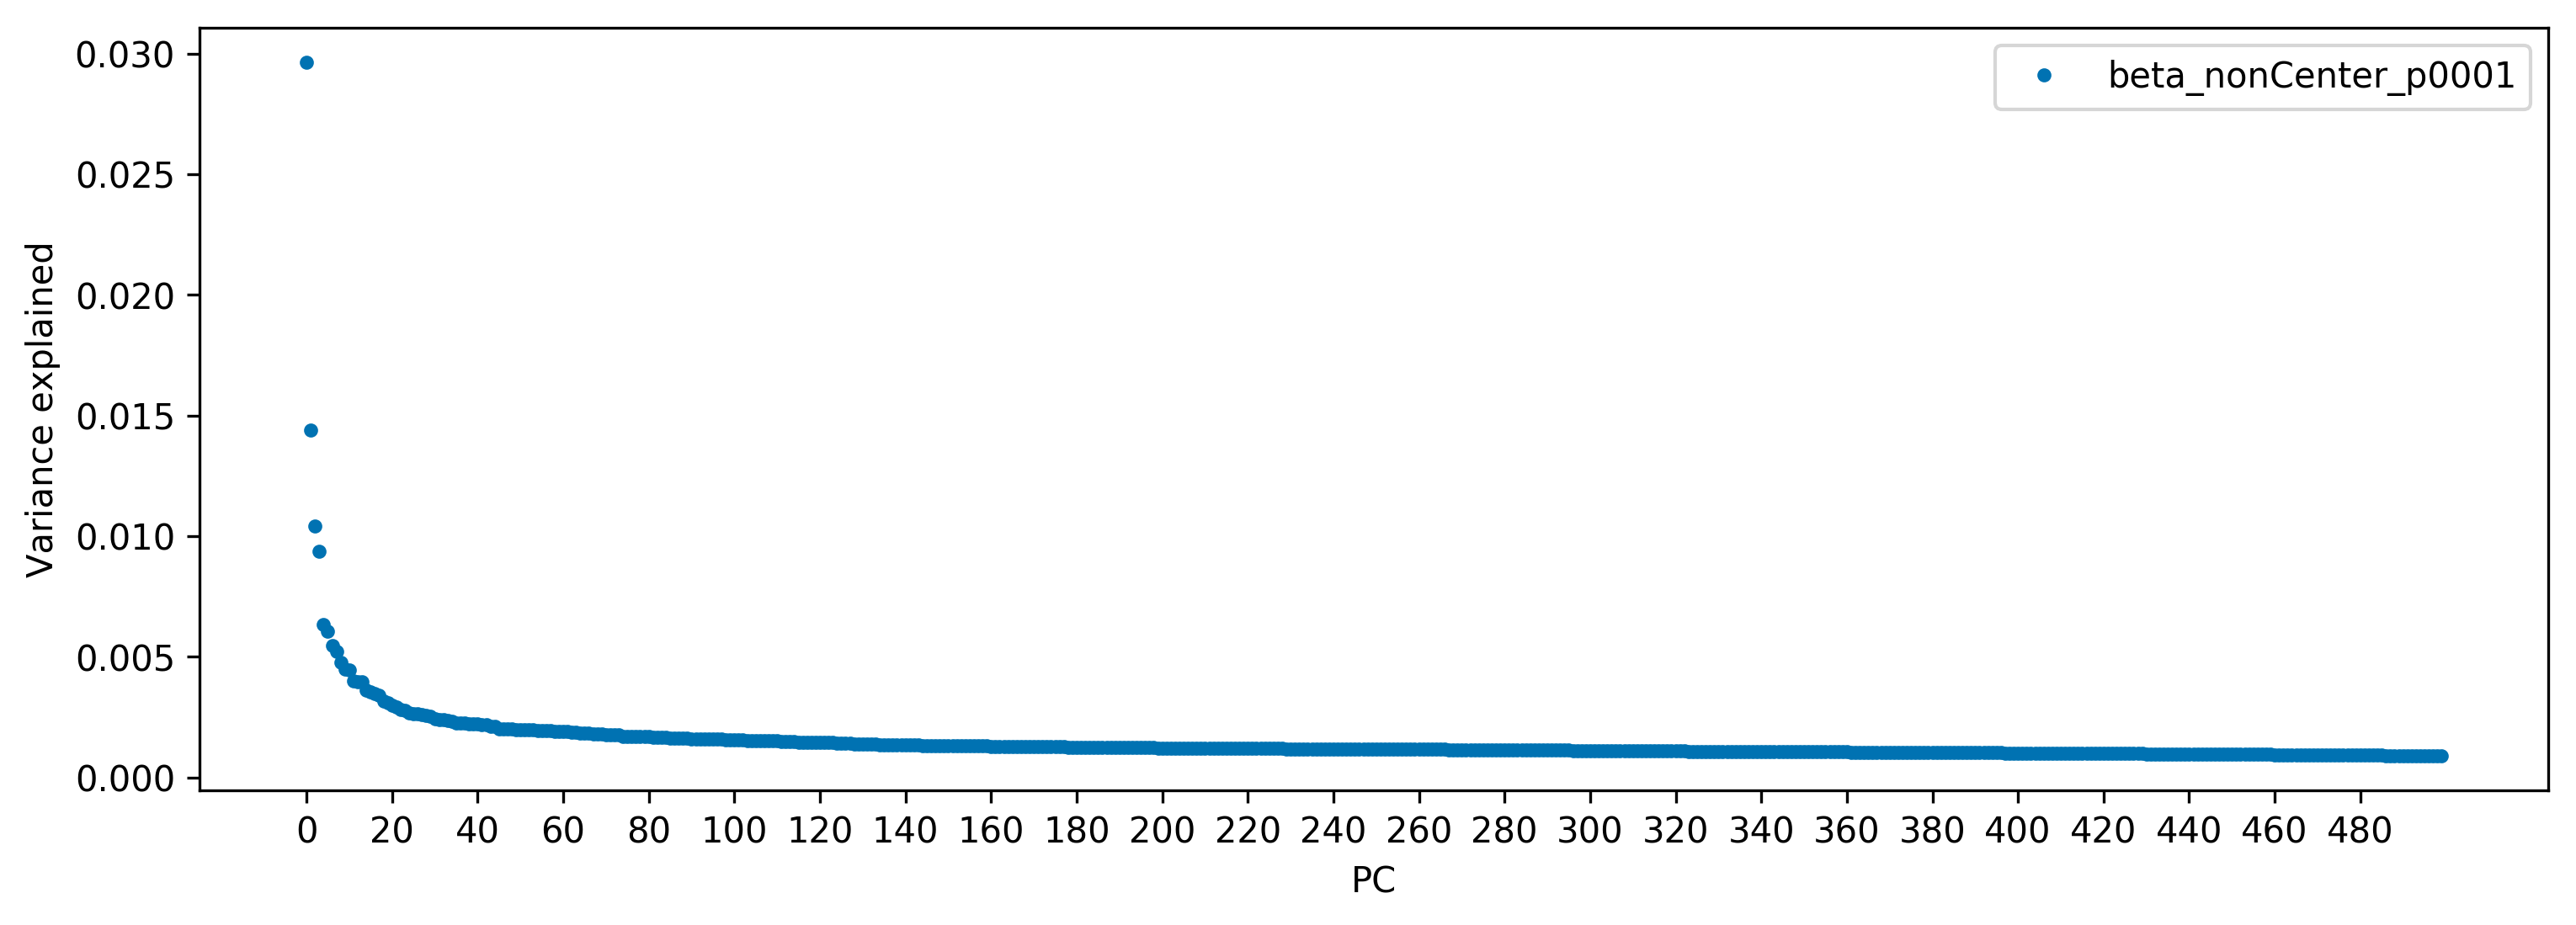

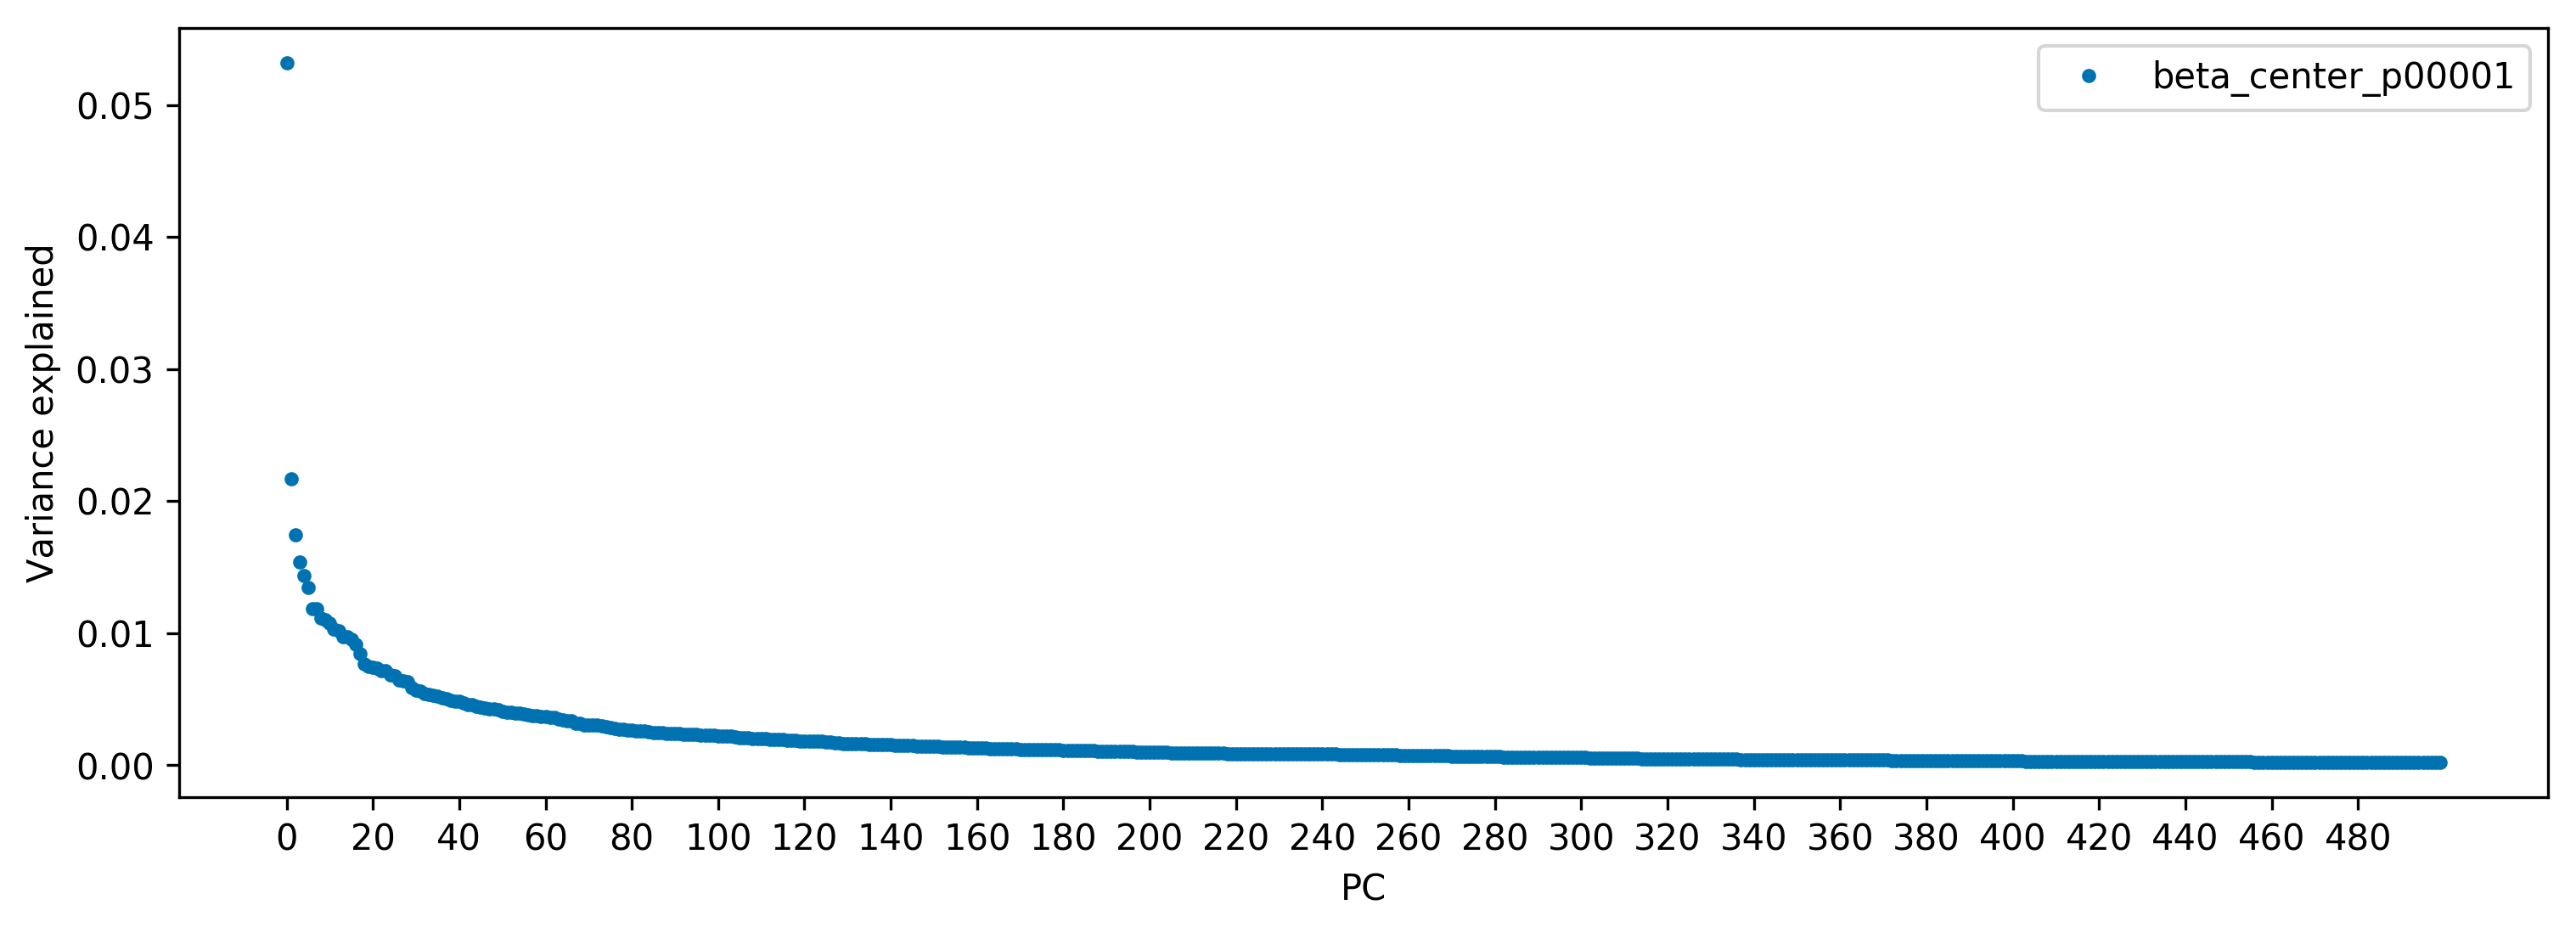

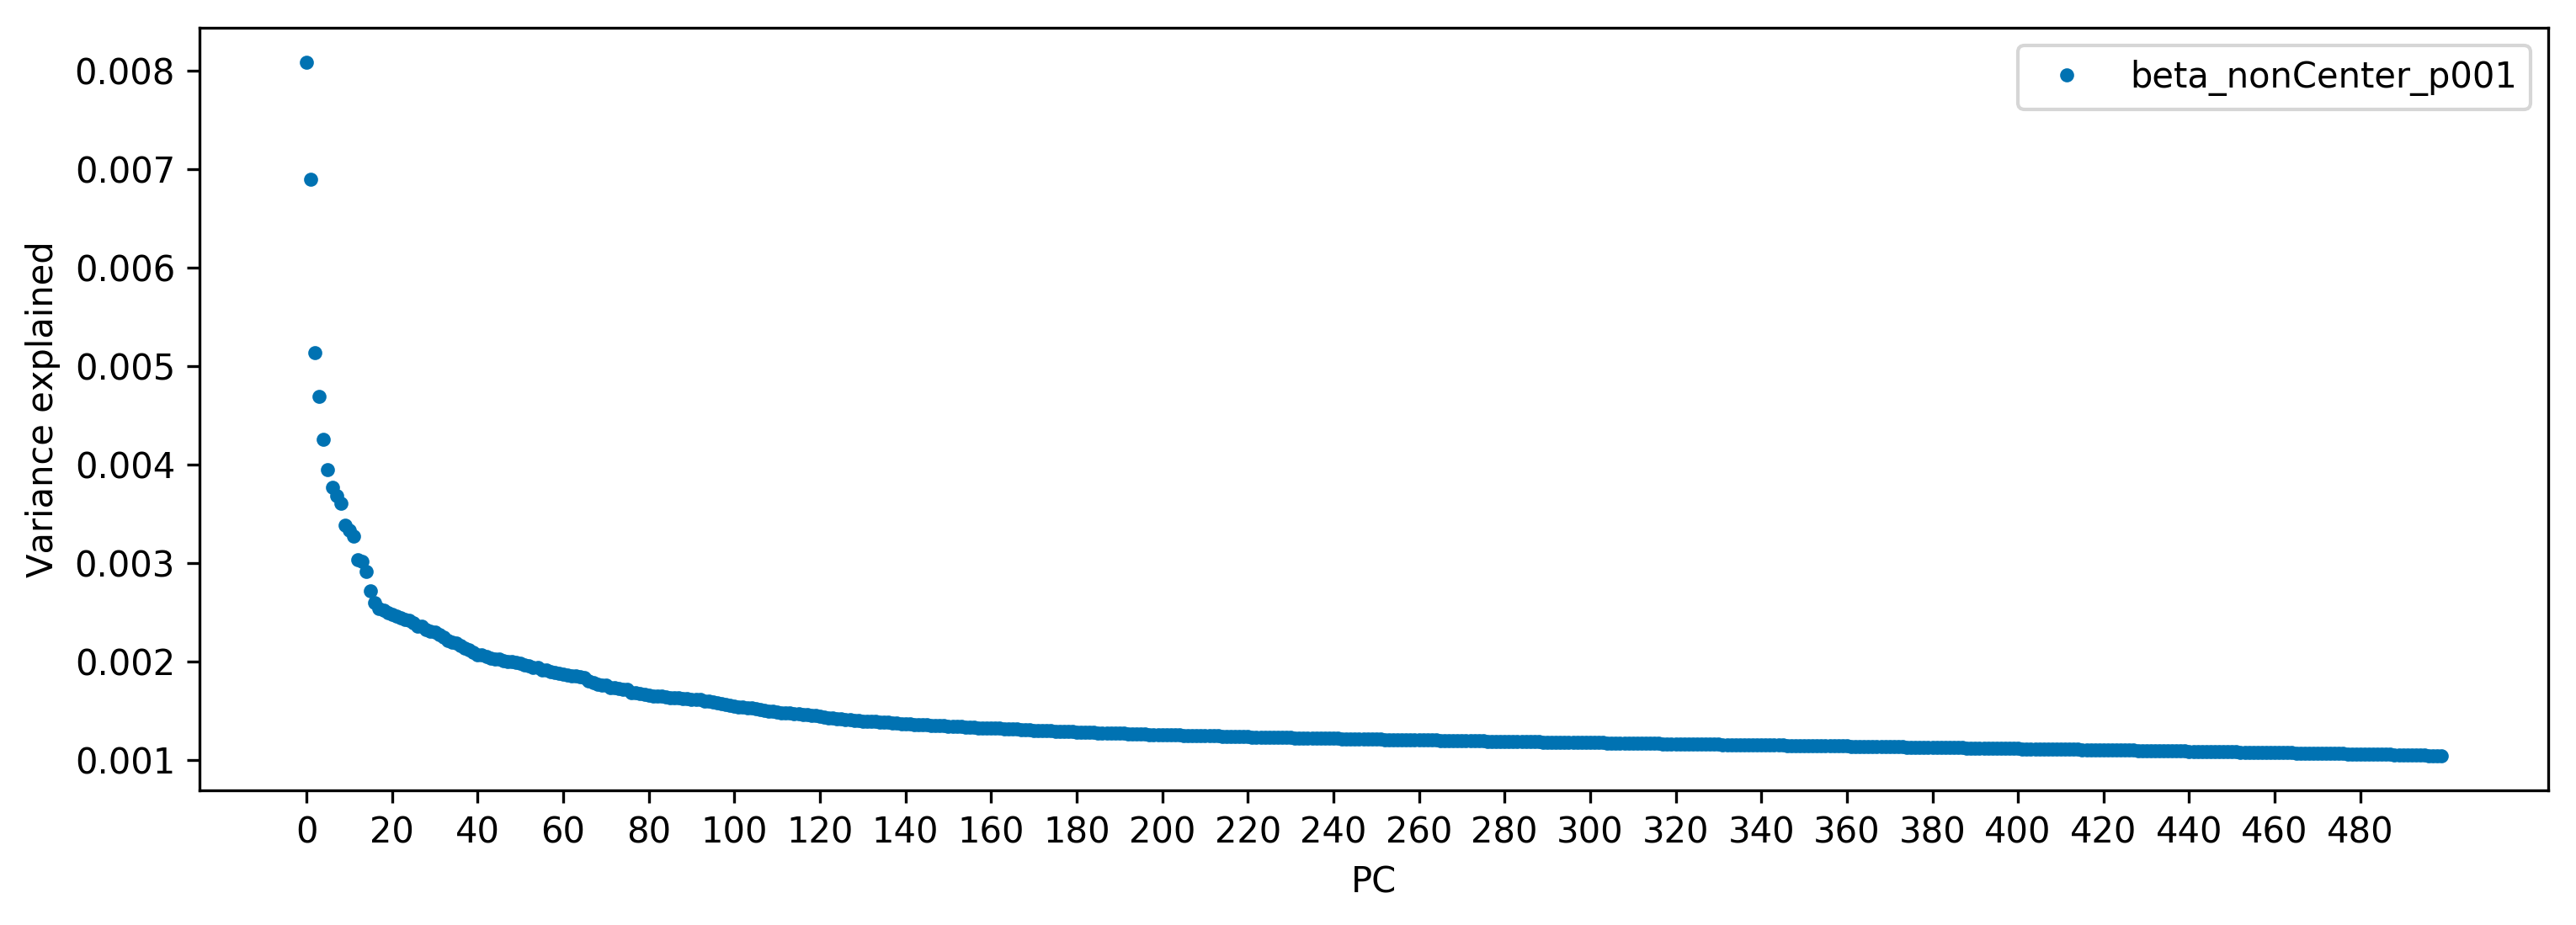

In [13]:
for npz in filter(lambda x: '20190621' in x, npzs):
    z=np.load(npz)
    plt.figure(figsize=(12,4), dpi=300)
    plt.plot(np.arange(z['D'].shape[0]), z['variance_explained_ratio'], '.')
    plt.xticks(np.arange(0,z['D'].shape[0],20))
    plt.xlabel('PC'),plt.ylabel('Variance explained')
    # plt.plot([0,z['D'].shape[0]],[1.0/z['V'].shape[0],1.0/z['V'].shape[0]], 'k--')
    plt.legend([os.path.splitext(os.path.basename(npz))[0][4:-16]]) #, 'Isotropic variance'])
    plt.show()

In [14]:
z['V'].shape

(2087, 500)